### Foreclosure means repaying the outstanding loan amount in a single payment instead of with EMIs 

foreclosure signForeclosure is the process by which lenders recover a loan by repossessing the property that the loan was for and reselling it to recoup loss. A lender has the legal right to foreclose a home when a borrower fails to make mortgage payments over an extended period of time.

#### problem will focus on optimizing precision and recall(sensitvity)

In [1]:
import numpy as np
import pandas as pd

In [2]:
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.expand_frame_repr', True) 

In [3]:
import os

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import random
import datetime
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Imports for better visualization
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 4)
rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 8
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

In [6]:
train = pd.read_csv('./data/train_foreclosure.csv')
test = pd.read_csv('./data/test_foreclosure.csv')
customers = pd.read_excel('./data/Customers_31JAN2019.xlsx')
query = pd.read_excel('./data/RF_Final_Data.xlsx')

In [7]:
agreements = pd.read_excel('./data/LMS_31JAN2019.xlsx')

In [190]:
train.head()

,AGREEMENTID,FORECLOSURE
0,11220001,1
1,11220002,1
2,11220006,1
3,11220008,1
4,11220010,1


In [191]:
test.head()

,AGREEMENTID,FORECLOSURE
0,11220003,NaN
1,11220004,NaN
2,11220005,NaN
3,11220007,NaN
4,11220009,NaN


In [192]:
customers.head()

,CUSTOMERID,CUST_CONSTTYPE_ID,CUST_CATEGORYID,PROFESSION,AGE,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,OCCUPATION,POSITION,GROSS_INCOME,PRE_JOBYEARS,NETTAKEHOMEINCOME,BRANCH_PINCODE
0,12001000,1,5,NaN,33.0,M,M,POSTGRAD,0.0,NaN,NaN,198375.221829,8.0,198375.221829,400070.0
1,12001001,1,5,NaN,44.0,M,M,POSTGRAD,0.0,NaN,NaN,242703.982915,10.0,242703.982915,400070.0
2,12001002,1,7,NaN,50.0,M,M,GRAD,0.0,NaN,NaN,0.000000,NaN,0.000000,400070.0
3,12001003,3,4,NaN,40.0,M,M,GRAD,0.0,NaN,NaN,365263.511624,NaN,365263.516128,400070.0
4,12001004,3,4,NaN,27.0,M,M,GRAD,0.0,NaN,NaN,187342.198995,NaN,187342.198995,400070.0


In [193]:
customers.describe()

,CUSTOMERID,CUST_CONSTTYPE_ID,CUST_CATEGORYID,PROFESSION,AGE,NO_OF_DEPENDENT,OCCUPATION,GROSS_INCOME,PRE_JOBYEARS,NETTAKEHOMEINCOME,BRANCH_PINCODE
count,1.000000e+04,10000.000000,10000.000000,0.0,9604.000000,9921.000000,0.0,1.000000e+04,2375.000000,1.000000e+04,9927.000000
mean,1.200778e+07,1.103600,4.495000,NaN,40.844648,0.519202,NaN,1.544479e+05,4.554526,1.536376e+05,469059.826030
std,3.842990e+03,0.526018,0.829605,NaN,9.344151,1.097127,NaN,5.801275e+05,6.254120,5.797531e+05,148742.720744
min,1.200100e+07,1.000000,4.000000,NaN,18.000000,0.000000,NaN,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,1.200464e+07,1.000000,4.000000,NaN,34.000000,0.000000,NaN,4.503887e+04,0.000000,4.503887e+04,400070.000000
50%,1.200787e+07,1.000000,4.000000,NaN,40.000000,0.000000,NaN,7.506479e+04,2.000000,7.506479e+04,500034.000000
75%,1.201094e+07,1.000000,5.000000,NaN,48.000000,0.000000,NaN,1.288645e+05,7.000000,1.285860e+05,602001.000000
max,1.203390e+07,6.000000,8.000000,NaN,76.000000,10.000000,NaN,2.691744e+07,42.000000,2.691744e+07,641601.000000


In [194]:
agreements.head()

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,AUTHORIZATIONDATE,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
0,11220001,12001000.0,1.171011e+07,1.171011e+07,2010-08-30,13.734072,10.612692,58.0,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,7.516699e+06,7.332154e+06,184544.396568,29042.45880,29042.4588,0.00000,184544.396568,2.262177e+06,9.447930e+06,2.617476e+06,9.338009e+06,2013-11-01,83559.0,40.06,39,19.0,0.0,0.6000,HL,10901100.0,NaN,NaN,39
1,11220002,12001001.0,1.929025e+07,1.929025e+07,2010-09-15,13.734072,10.612692,137.0,180,1,2010-09-15,MUMBAI,100504.575864,100504.575864,0.0,1.061903e+07,1.033958e+07,279448.084560,0.00000,0.0000,0.00000,279448.084560,1.234760e+07,6.942656e+06,4.945154e+06,1.713861e+07,2013-11-01,126530.0,84.31,38,99.0,0.0,0.6000,HL,10901100.0,NaN,NaN,38
2,11220003,12001002.0,4.053499e+06,4.053499e+06,2010-09-06,17.167590,12.485520,360.0,180,5,2010-09-06,MUMBAI,0.000000,0.000000,0.0,2.439242e+06,2.439242e+06,0.000000,0.44171,0.0000,0.44171,-0.441710,3.944954e+06,1.085444e+05,1.549566e+06,3.944954e+06,2013-11-05,30898.0,79.34,38,322.0,0.0,0.9100,HL,10901101.0,NaN,NaN,38
3,11220004,12001003.0,1.325703e+07,1.325703e+07,2010-09-29,15.606900,10.924830,198.0,180,5,2010-09-29,MUMBAI,28441.732656,28441.732656,0.0,7.211965e+06,7.211965e+06,0.000000,0.00000,0.0000,0.00000,0.000000,1.030278e+07,2.954253e+06,4.219464e+06,1.255472e+07,2013-11-05,88256.0,86.86,37,161.0,0.0,0.9686,HL,10901101.0,NaN,NaN,38
4,11220005,12001004.0,1.321140e+07,1.321140e+07,2010-09-06,16.543314,11.861244,142.0,180,5,2010-09-06,MUMBAI,0.000000,0.000000,0.0,7.712034e+06,7.712034e+06,0.000000,0.00000,0.0000,0.00000,0.000000,8.479158e+06,4.732245e+06,3.812974e+06,1.178201e+07,2013-11-05,91892.0,40.93,38,104.0,0.0,0.7300,HL,10901101.0,NaN,NaN,38


In [195]:
agreements.describe()

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,SCHEMEID,MOB
count,6.242500e+05,6.237340e+05,6.242500e+05,6.242500e+05,624250.000000,624250.000000,624245.000000,624250.000000,624250.000000,6.242500e+05,6.242500e+05,6.242500e+05,6.242500e+05,6.242500e+05,6.242500e+05,6.242500e+05,6.242500e+05,6.242500e+05,6.242500e+05,6.242500e+05,6.242500e+05,6.242500e+05,6.242500e+05,6.122050e+05,624250.000000,624250.000000,624245.000000,624219.000000,624250.000000,6.237340e+05,624250.000000
mean,1.123081e+07,1.201179e+07,5.828204e+06,5.778192e+06,15.068840,14.997058,178.406491,177.910326,6.405117,6.221159e+04,6.201999e+04,1.915964e+02,1.868918e+06,1.832613e+06,3.630521e+04,2.176622e+05,2.088516e+05,8.810573e+03,2.768623e+04,5.303931e+06,5.320235e+05,9.637954e+05,5.442760e+06,4.855566e+04,48.825046,15.256937,163.149432,7.921803,21.479576,1.090119e+07,16.767239
std,7.984211e+03,7.961736e+03,1.323121e+07,1.313555e+07,2.506164,2.470942,49.490712,44.212338,3.533971,3.555793e+05,3.549530e+05,9.510358e+03,6.891111e+06,6.782725e+06,5.739616e+05,2.274487e+06,2.234830e+06,4.076866e+05,6.818236e+05,1.209923e+07,1.235317e+07,3.293273e+06,1.226295e+07,2.398423e+05,20.531984,15.549111,52.995329,65.112792,2687.131947,8.546587e+01,15.613276
min,1.122000e+07,1.200100e+07,3.753240e+04,3.753240e+04,-5.056636,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-7.734998e+07,-7.506479e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,0.380000,0.000000,0.000000,0.000000,-170.330000,1.090110e+07,0.000000
25%,1.122430e+07,1.200530e+07,1.516309e+06,1.501296e+06,13.109796,13.109796,150.000000,168.000000,5.000000,4.975868e+03,4.967033e+03,0.000000e+00,1.233145e+05,1.215195e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.104276e+00,1.441153e+06,1.406301e+04,8.360153e+04,1.469379e+06,1.040000e+04,32.780000,3.000000,128.000000,0.000000,0.400000,1.090111e+07,5.000000
50%,1.122894e+07,1.200993e+07,2.627268e+06,2.593211e+06,14.982624,14.982624,180.000000,180.000000,5.000000,1.222875e+04,1.221992e+04,0.000000e+00,4.614637e+05,4.531783e+05,0.000000e+00,1.104276e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.404174e+06,5.964873e+04,2.681067e+05,2.483012e+06,1.900000e+04,50.290000,10.000000,169.000000,0.000000,0.510000,1.090115e+07,12.000000
75%,1.123592e+07,1.201690e+07,5.209731e+06,5.166899e+06,17.167590,16.543314,203.000000,180.000000,5.000000,3.607449e+04,3.607449e+04,0.000000e+00,1.403642e+06,1.371928e+06,0.000000e+00,1.329548e+03,2.606091e+02,1.104276e+00,0.000000e+00,4.654986e+06,2.129521e+05,7.640072e+05,4.850362e+06,3.759200e+04,64.840000,23.000000,182.000000,0.000000,0.690000,1.090129e+07,24.000000
max,1.125335e+07,1.203390e+07,5.704924e+08,5.674589e+08,37.456560,34.147897,713.000000,300.000000,15.000000,3.177540e+07,3.177540e+07,2.089129e+06,3.936390e+08,3.888015e+08,5.899531e+07,2.841642e+08,2.841642e+08,7.734998e+07,5.672502e+07,5.674589e+08,4.885217e+09,1.845529e+08,5.674589e+08,8.496881e+07,104.860000,98.000000,693.000000,2268.000000,547616.000000,1.090146e+07,98.000000


In [196]:
query.head()

,TicketId,Type,SubType,Status,Date,Preprocessed_EmailBody,Preprocessed_Subject,Masked_CustomerID,Masked_AgreementID
0,571910,REQUEST,PROVISIONAL IT CERTIFICATE,Close,2019-01-23 16:34:00,"hi team, can you please provide me itcertifica...",loan account number - loannumber,12020736,0
1,572747,REQUEST,SOA,Close,2019-01-24 16:05:00,hi team can you please arrange the certificate...,certificate of interest and principal for home...,12019080,0
2,4622,General,Others,Close,2016-02-12 13:40:00,NaN,re: repaysch : loan number loannumber,12004815,0
3,4674,REQUEST,SOA,Close,2016-02-12 15:41:00,"dear sir, you for your promptreply, please not...",re: finalit : loan number loannumber,12005158,11230237
4,4681,QUERY,CHANGEOFROI,Close,2016-02-12 15:55:00,"dear sachin, for your mail. this seems a great...",re: fw: repaysch : loan number loannumber,12001022,0


In [197]:
query['Type'].value_counts()

REQUEST        5865
QUERY          1502
COMPLAINT        94
General          29
Foreclosure       9
ROI               6
Unassigned        4
Request           2
Name: Type, dtype: int64

#### So our problem is to predict foreclosure probability for an agreement, here are a few hypothesis 
1. for one customer there can be multiple agreements
2. so the foreclosure depends on the customers' history and current perform and the loan nature
3. we will use agreements data as training data merging it with train_foreclosure as we have to predict foreclosure for an agreement only, merge the customers info with it and use queries made by a particular customer as metadata to determine the nature of service provided to the customer. 
4. this would help us understand the foreclosure reasons for each customer

In [9]:
### but the first basis would be created from the agreements dataset

## Datasets

In [199]:
# train_foreclosure
print( train['AGREEMENTID'].nunique() , train['AGREEMENTID'].unique())

20012 [11220001 11220002 11220006 ... 11253351 11253353 11253354]


In [200]:
print( test['AGREEMENTID'].nunique() , test['AGREEMENTID'].unique())

13342 [11220003 11220004 11220005 ... 11253342 11253343 11253352]


In [201]:
agreements['AGREEMENTID'].nunique()

33354

##### it is easily noticable that agreements data contains agreement IDs from train and test collectively
if you want to check simply add up the nuniques from both which is equal to nunique of agreements data

In [202]:
agreements.head(10)#[agreements['AGREEMENTID']==11220001]

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,AUTHORIZATIONDATE,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
0,11220001,12001000.0,1.171011e+07,1.171011e+07,2010-08-30,13.734072,10.612692,58.0,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,7.516699e+06,7.332154e+06,184544.396568,29042.458800,29042.458800,0.00000,184544.396568,2.262177e+06,9.447930e+06,2.617476e+06,9.338009e+06,2013-11-01,83559.0,40.06,39,19.0,0.0,0.6000,HL,10901100.0,NaN,NaN,39
1,11220002,12001001.0,1.929025e+07,1.929025e+07,2010-09-15,13.734072,10.612692,137.0,180,1,2010-09-15,MUMBAI,100504.575864,100504.575864,0.0,1.061903e+07,1.033958e+07,279448.084560,0.000000,0.000000,0.00000,279448.084560,1.234760e+07,6.942656e+06,4.945154e+06,1.713861e+07,2013-11-01,126530.0,84.31,38,99.0,0.0,0.6000,HL,10901100.0,NaN,NaN,38
2,11220003,12001002.0,4.053499e+06,4.053499e+06,2010-09-06,17.167590,12.485520,360.0,180,5,2010-09-06,MUMBAI,0.000000,0.000000,0.0,2.439242e+06,2.439242e+06,0.000000,0.441710,0.000000,0.44171,-0.441710,3.944954e+06,1.085444e+05,1.549566e+06,3.944954e+06,2013-11-05,30898.0,79.34,38,322.0,0.0,0.9100,HL,10901101.0,NaN,NaN,38
3,11220004,12001003.0,1.325703e+07,1.325703e+07,2010-09-29,15.606900,10.924830,198.0,180,5,2010-09-29,MUMBAI,28441.732656,28441.732656,0.0,7.211965e+06,7.211965e+06,0.000000,0.000000,0.000000,0.00000,0.000000,1.030278e+07,2.954253e+06,4.219464e+06,1.255472e+07,2013-11-05,88256.0,86.86,37,161.0,0.0,0.9686,HL,10901101.0,NaN,NaN,38
4,11220005,12001004.0,1.321140e+07,1.321140e+07,2010-09-06,16.543314,11.861244,142.0,180,5,2010-09-06,MUMBAI,0.000000,0.000000,0.0,7.712034e+06,7.712034e+06,0.000000,0.000000,0.000000,0.00000,0.000000,8.479158e+06,4.732245e+06,3.812974e+06,1.178201e+07,2013-11-05,91892.0,40.93,38,104.0,0.0,0.7300,HL,10901101.0,NaN,NaN,38
5,11220006,12001005.0,3.933395e+06,3.933395e+06,2010-11-01,16.231176,11.549106,359.0,180,5,2010-11-02,MUMBAI,5947.630536,5947.630536,0.0,2.147360e+06,2.147360e+06,0.000000,0.000000,0.000000,0.00000,0.000000,3.830337e+06,1.030583e+05,1.360684e+06,3.830337e+06,2013-11-05,28518.0,50.89,36,323.0,0.0,0.7200,HL,10901101.0,NaN,NaN,36
6,11220007,12001006.0,6.155313e+06,6.155313e+06,2010-10-11,16.543314,12.485520,262.0,180,5,2010-10-11,MUMBAI,451447.905768,451447.905768,0.0,2.921729e+06,2.921729e+06,0.000000,6133.148904,6133.148904,0.00000,0.000000,5.929700e+06,2.256132e+05,2.067353e+06,5.929700e+06,2013-11-05,47247.0,45.32,28,234.0,0.0,1.2300,HL,10901101.0,NaN,NaN,37
7,11220008,12001007.0,1.002259e+07,1.002259e+07,2010-10-06,13.734072,10.612692,194.0,180,1,2010-10-06,THANE,60322.180776,60322.180776,0.0,5.372119e+06,5.226927e+06,145192.417032,0.000000,0.000000,0.00000,145192.417032,8.211513e+06,1.811075e+06,2.984047e+06,9.412549e+06,2013-11-01,65741.0,84.63,37,157.0,0.0,0.6000,HL,10901100.0,NaN,NaN,37
8,11220009,12001008.0,9.499284e+06,9.499284e+06,2010-11-10,18.915563,13.609217,287.0,180,5,2010-11-05,MUMBAI,188502.121752,188502.121752,0.0,5.810343e+06,5.795245e+06,15097.661472,171229.036560,171229.036560,0.00000,15097.661472,9.228138e+06,2.711462e+05,3.796394e+06,9.228138e+06,2013-11-05,77530.0,52.34,34,253.0,25.0,0.6100,LAP,10901109.0,NaN,NaN,36
9,11220010,12001009.0,7.755937e+06,7.755937e+06,2010-10-26,15.606900,10.924830,341.0,180,5,2010-10-26,MUMBAI,27732.787464,27732.787464,0.0,4.117673e+06,4.117673e+06,0.000000,0.000000,0.000000,0.00000,0.000000,7.511708e+06,2.442289e+05,2.573672e+06,7.511708e+06,2013-11-05,54433.0,30.94,36,305.0,0.0,0.8300,HL,10901101.0,NaN,NaN,37


In [204]:
agreements.isna().sum()

AGREEMENTID                   0
CUSTOMERID                  516
LOAN_AMT                      0
NET_DISBURSED_AMT             0
INTEREST_START_DATE           0
CURRENT_ROI                   0
ORIGNAL_ROI                   0
CURRENT_TENOR                 5
ORIGNAL_TENOR                 0
DUEDAY                        0
AUTHORIZATIONDATE             0
CITY                          8
PRE_EMI_DUEAMT                0
PRE_EMI_RECEIVED_AMT          0
PRE_EMI_OS_AMOUNT             0
EMI_DUEAMT                    0
EMI_RECEIVED_AMT              0
EMI_OS_AMOUNT                 0
EXCESS_AVAILABLE              0
EXCESS_ADJUSTED_AMT           0
BALANCE_EXCESS                0
NET_RECEIVABLE                0
OUTSTANDING_PRINCIPAL         0
PAID_PRINCIPAL                0
PAID_INTEREST                 0
MONTHOPENING                  0
LAST_RECEIPT_DATE          3787
LAST_RECEIPT_AMOUNT       12045
NET_LTV                       0
COMPLETED_TENURE              0
BALANCE_TENURE                5
DPD     

In [205]:
agreements.dropna().shape

(13195, 38)

In [206]:
agreements['CUSTOMERID'].dropna().nunique()

32895

In [207]:
agreements[agreements['CUSTOMERID'].isna()]

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,AUTHORIZATIONDATE,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
545787,11252411,NaN,1.411425e+06,1.411425e+06,2018-10-31,17.479728,17.479728,240.0,240,5,2018-10-31,AURANGABAD,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.411425e+06,0.0,0.000000,1.411425e+06,2018-10-31,13867.0,70.95,0,240.0,0.0,0.46,STHL,NaN,NaN,NaN,0
545788,11252412,NaN,2.781796e+06,2.781796e+06,2018-10-31,13.734072,13.734072,180.0,180,1,2018-10-31,WARANGAL,1252.248984,0.000000,1252.248984,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1252.248984,2.781796e+06,0.0,0.000000,2.781796e+06,NaT,NaN,59.62,0,180.0,0.0,0.44,STLAP,NaN,NaN,NaN,0
570874,11252718,NaN,1.201037e+06,1.201037e+06,2018-11-30,13.734072,13.734072,144.0,144,5,2018-11-30,THANE,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.201037e+06,0.0,0.000000,1.201037e+06,NaT,NaN,23.50,0,144.0,0.0,0.51,LAP,NaN,NaN,NaN,0
570875,11252719,NaN,3.727545e+06,3.727545e+06,2018-11-23,13.421934,13.421934,240.0,240,5,2018-11-23,THANE,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,3.727545e+06,0.0,0.000000,3.727545e+06,2018-11-23,29300.0,87.23,0,240.0,0.0,0.50,STHL,NaN,NaN,NaN,0
570876,11252411,NaN,1.411425e+06,1.411425e+06,2018-10-31,17.479728,17.479728,240.0,240,5,2018-10-31,AURANGABAD,4039.441608,4039.441608,0.000000,0.000000,0.0,0.000000,260.609136,0.0,260.609136,-260.609136,1.411425e+06,0.0,2745.870018,1.411425e+06,2018-11-27,118.0,70.95,0,240.0,0.0,0.46,STHL,NaN,NaN,NaN,1
570877,11252412,NaN,2.781796e+06,2.781796e+06,2018-10-31,13.734072,13.734072,180.0,180,1,2018-10-31,WARANGAL,1252.248984,1252.248984,0.000000,46514.313672,0.0,46514.313672,72.882216,0.0,72.882216,46441.431456,2.781796e+06,0.0,851.234719,2.781796e+06,2018-11-17,118.0,59.62,1,179.0,0.0,0.44,STLAP,NaN,NaN,NaN,1
570878,11252720,NaN,1.501296e+06,1.501296e+06,2018-11-30,16.231176,16.231176,240.0,240,5,2018-11-30,PUNE,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.501296e+06,0.0,0.000000,1.501296e+06,2018-11-30,14750.0,31.06,0,240.0,0.0,0.46,STHL,NaN,NaN,NaN,0
570879,11252721,NaN,1.606387e+06,9.837691e+05,2018-11-28,14.982624,14.982624,144.0,144,5,2018-11-28,TIRUVALLUR,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,9.837691e+05,0.0,0.000000,9.837691e+05,2018-11-26,13039.0,58.77,0,144.0,0.0,0.30,STHL,NaN,NaN,NaN,0
570880,11252722,NaN,3.852325e+06,3.852325e+06,2018-11-30,13.421934,13.421934,240.0,240,15,2018-11-30,CHENNAI,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,3.852325e+06,0.0,0.000000,3.852325e+06,2018-11-30,31950.0,89.97,0,240.0,0.0,0.58,STHL,NaN,NaN,NaN,0
570881,11252723,NaN,1.651425e+06,1.651425e+06,2018-11-30,14.670486,14.670486,192.0,192,5,2018-11-30,HYDERABAD,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.651425e+06,0.0,0.000000,1.651425e+06,2018-11-30,13570.0,55.56,0,192.0,0.0,0.26,STHL,NaN,NaN,NaN,0


In [208]:
agreements['CUSTOMERID'].nunique()

32895

#### all the loan amounts are in power 6 or power 5 range, also there is no specific scheme ID or npa for the same.
1. is it the same customer, which might a big company/firm?
2. validate this by EDA

1. we need data of 32895 customers. 
2. lets check how much unique customers are there actually in customer_data

In [209]:
customers.head()

,CUSTOMERID,CUST_CONSTTYPE_ID,CUST_CATEGORYID,PROFESSION,AGE,SEX,MARITAL_STATUS,QUALIFICATION,NO_OF_DEPENDENT,OCCUPATION,POSITION,GROSS_INCOME,PRE_JOBYEARS,NETTAKEHOMEINCOME,BRANCH_PINCODE
0,12001000,1,5,NaN,33.0,M,M,POSTGRAD,0.0,NaN,NaN,198375.221829,8.0,198375.221829,400070.0
1,12001001,1,5,NaN,44.0,M,M,POSTGRAD,0.0,NaN,NaN,242703.982915,10.0,242703.982915,400070.0
2,12001002,1,7,NaN,50.0,M,M,GRAD,0.0,NaN,NaN,0.000000,NaN,0.000000,400070.0
3,12001003,3,4,NaN,40.0,M,M,GRAD,0.0,NaN,NaN,365263.511624,NaN,365263.516128,400070.0
4,12001004,3,4,NaN,27.0,M,M,GRAD,0.0,NaN,NaN,187342.198995,NaN,187342.198995,400070.0


In [210]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
CUSTOMERID           10000 non-null int64
CUST_CONSTTYPE_ID    10000 non-null int64
CUST_CATEGORYID      10000 non-null int64
PROFESSION           0 non-null float64
AGE                  9604 non-null float64
SEX                  9606 non-null object
MARITAL_STATUS       9604 non-null object
QUALIFICATION        9397 non-null object
NO_OF_DEPENDENT      9921 non-null float64
OCCUPATION           0 non-null float64
POSITION             661 non-null object
GROSS_INCOME         10000 non-null float64
PRE_JOBYEARS         2375 non-null float64
NETTAKEHOMEINCOME    10000 non-null float64
BRANCH_PINCODE       9927 non-null float64
dtypes: float64(8), int64(3), object(4)
memory usage: 1.1+ MB


In [211]:
customers['CUSTOMERID'].nunique()

10000

In [212]:
# but here we have info for 10k customers only, something is shady here!!!!!!!!!!!!!!!

In [213]:
# lets us just check customers in train dataset's agreements only/

In [214]:
agreements[agreements['AGREEMENTID'].isin(train['AGREEMENTID'].unique())]['CUSTOMERID'].dropna().nunique()

19731

In [215]:
# SIMILAR FOR TEST DATASET
agreements[agreements['AGREEMENTID'].isin(test['AGREEMENTID'].unique())]['CUSTOMERID'].dropna().nunique()

13164

In [216]:
agreements[~agreements['CUSTOMERID'].isin(customers['CUSTOMERID'].unique())]

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,AUTHORIZATIONDATE,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
16,11220017,12001016.0,9.758423e+05,9.758423e+05,2010-11-27,17.479728,13.109796,309.0,180,1,2010-11-25,THANE,1674.082416,1674.082416,0.0,5.996837e+05,5.829274e+05,16756.284024,0.000000e+00,0.000000e+00,0.00000,16756.284024,9.352069e+05,4.063539e+04,3.567561e+05,9.352069e+05,2013-11-01,7587.0,23.77,36,273.0,0.0,0.60,LAP,10901116.0,NaN,NaN,36
32,11220033,12001032.0,9.624602e+06,9.624602e+06,2010-12-05,14.046210,10.937352,223.0,300,5,2010-11-30,MUMBAI,0.000000,0.000000,0.0,5.160993e+06,5.160993e+06,0.000000,1.258875e+00,1.258875e+00,0.00000,0.000000,8.939140e+06,6.854622e+05,3.005298e+06,9.121639e+06,2013-11-05,67537.0,51.70,35,188.0,0.0,0.89,HL,10901101.0,NaN,NaN,35
43,11220044,12001043.0,1.452504e+07,1.452504e+07,2011-01-31,18.416142,13.734072,167.0,120,15,2011-01-29,MUMBAI,97936.029888,97936.029888,0.0,9.713304e+06,9.713304e+06,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,1.310747e+07,1.417562e+06,5.251773e+06,1.310747e+07,2013-11-15,133274.0,60.00,33,134.0,0.0,0.52,LAP,10901117.0,NaN,NaN,34
46,11220047,12001046.0,6.755831e+07,6.755831e+07,2010-12-06,16.543314,13.421934,97.0,84,5,2010-12-06,MUMBAI,890693.561736,890693.561736,0.0,5.572633e+07,5.572633e+07,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,5.242822e+07,1.513009e+07,2.335617e+07,5.242822e+07,2013-11-05,764608.0,64.29,33,64.0,0.0,0.69,LAP,10901109.0,NaN,NaN,35
57,11220058,12001057.0,6.657965e+06,6.657965e+06,2011-03-03,14.358348,12.173382,247.0,180,5,2011-02-28,MUMBAI,5307.150456,5307.150456,0.0,3.320319e+06,3.320319e+06,0.000000,0.000000e+00,0.000000e+00,0.00000,0.000000,6.409065e+06,2.488998e+05,2.011744e+06,6.409065e+06,2013-11-05,46981.0,82.13,32,215.0,0.0,0.46,HL,10901100.0,NaN,NaN,32
61,11220062,12001061.0,6.240022e+06,6.240022e+06,2011-03-08,15.919038,12.173382,360.0,300,5,2011-02-28,MUMBAI,0.000000,0.000000,0.0,3.030065e+06,3.030065e+06,0.000000,3.680331e+02,3.680331e+02,0.00000,0.000000,6.191347e+06,4.867531e+04,2.011056e+06,6.191347e+06,2013-11-05,45255.0,83.05,33,327.0,0.0,0.60,HL,10901100.0,NaN,NaN,32
65,11220066,12001065.0,1.876620e+05,1.876620e+05,2011-03-07,13.734072,13.109796,140.0,132,1,2011-03-07,MUMBAI,2014.199424,2014.199424,0.0,1.131485e+05,1.096126e+05,3535.891752,0.000000e+00,0.000000e+00,0.00000,3535.891752,1.650299e+05,2.263203e+04,5.324796e+04,1.650299e+05,2013-11-01,1601.0,33.78,32,108.0,0.0,0.60,HL,10901120.0,NaN,NaN,32
73,11220074,12001073.0,1.576361e+06,1.576361e+06,2011-03-31,16.855452,13.734072,314.0,180,1,2011-03-31,MUMBAI,708.945192,708.945192,0.0,8.434902e+05,8.171311e+05,26359.068120,0.000000e+00,0.000000e+00,0.00000,26359.068120,1.525329e+06,5.103205e+04,5.049068e+05,1.525329e+06,2013-11-01,11935.0,21.03,32,282.0,0.0,0.60,LAP,10901144.0,NaN,NaN,32
74,11220075,12001074.0,5.254535e+06,5.254535e+06,2011-03-31,17.791866,14.358348,284.0,180,15,2011-03-31,MUMBAI,37039.625592,37039.625592,0.0,2.807575e+06,2.807575e+06,0.000000,9.963131e+03,9.963131e+03,0.00000,0.000000,5.130533e+06,1.240025e+05,1.809666e+06,5.130533e+06,2013-11-15,42753.0,38.62,31,253.0,0.0,0.60,LAP,10901119.0,NaN,NaN,32
75,11220076,12001075.0,3.903369e+06,3.903369e+06,2011-03-26,17.791866,14.358348,60.0,120,15,2011-03-26,MUMBAI,36688.465824,36688.465824,0.0,2.502742e+06,2.502742e+06,0.000000,1.435559e+06,1.435559e+06,0.00000,0.000000,1.319861e+06,2.583508e+06,1.094392e+06,3.271546e+06,2013-11-15,36555.0,10.84,31,29.0,0.0,0.88,LAP,10901119.0,NaN,NaN,32


In [217]:
#thats almost half man!! where is the other half

In [218]:
## my final conclusion comes to that not all the customers history is available here, 
## how to tackle this???????
## lets do the same check in queries as well

### as the customer data is missing for some customers, we have to manually impute it

### but lest make predictions using agreements data first, we will merge the custmore data afterwards as its secondary

In [219]:
query['Masked_CustomerID'].nunique() , query['Masked_AgreementID'].nunique()

(2709, 402)

### Sort in timely fasion to explore better

##### lets look at the datetime range

In [282]:
agreements['LAST_RECEIPT_DATE'].dt.year.value_counts()

2018.0    260011
2017.0    142735
2016.0     97638
2015.0     68057
2014.0     45965
2013.0      6039
2012.0        14
2019.0         4
Name: LAST_RECEIPT_DATE, dtype: int64

In [233]:
## lets impute this outliers like 1974, 73,72 with their neighbouring datapoints

In [234]:
agreements[agreements['LAST_RECEIPT_DATE'].dt.year.isin([1974,1973,1972])]

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,AUTHORIZATIONDATE,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
8928,11220001,12001000.0,1.171011e+07,1.171011e+07,2010-08-30,13.421934,10.612692,58.0,120,1,1970-08-30,MUMBAI,7994.273589,7994.273589,0.0,7.885787e+06,7.885787e+06,0.000000e+00,2.904246e+04,2.904246e+04,0.000000,0.000000e+00,1.944731e+06,9.765377e+06,2.676370e+06,9.020563e+06,1974-02-02,83559.0,40.06,41,17.0,0.0,0.60,HL,10901100.0,NaN,NaN,42
8929,11220003,12001002.0,4.053499e+06,4.053499e+06,2010-09-06,17.167590,12.485520,360.0,180,5,1970-09-07,MUMBAI,0.000000,0.000000,0.0,2.643961e+06,2.643961e+06,0.000000e+00,4.417104e-01,0.000000e+00,0.441710,-4.417104e-01,3.941360e+06,1.121386e+05,1.685133e+06,3.941360e+06,1974-02-06,30898.0,79.34,41,319.0,0.0,0.91,HL,10901101.0,NaN,NaN,41
8930,11220005,12001004.0,1.321140e+07,1.321140e+07,2010-09-06,16.543314,11.861244,142.0,180,5,1970-09-07,MUMBAI,0.000000,0.000000,0.0,8.320879e+06,8.320879e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,8.344685e+06,4.866718e+06,4.092372e+06,1.164754e+07,1974-02-06,91892.0,40.93,41,101.0,0.0,0.73,HL,10901101.0,NaN,NaN,41
8931,11220006,12001005.0,3.933395e+06,3.933395e+06,2010-11-01,16.231176,11.549106,359.0,180,5,1970-11-03,MUMBAI,5947.630536,5947.630536,0.0,2.336310e+06,2.336310e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,3.826338e+06,1.070572e+05,1.485127e+06,3.826338e+06,1974-02-06,28518.0,50.89,39,320.0,0.0,0.72,HL,10901101.0,NaN,NaN,39
8932,11220007,12001006.0,6.155313e+06,6.155313e+06,2010-10-11,16.543314,12.485520,262.0,180,5,1970-10-12,MUMBAI,451447.905768,451447.905768,0.0,3.234771e+06,3.234771e+06,0.000000e+00,6.133149e+03,6.133149e+03,0.000000,0.000000e+00,5.913144e+06,2.421685e+05,2.263593e+06,5.913144e+06,1974-02-06,47247.0,45.32,31,231.0,0.0,1.23,HL,10901101.0,NaN,NaN,40
8933,11220008,12001007.0,1.002259e+07,1.002259e+07,2010-10-06,13.421934,10.612692,190.0,180,1,1970-10-07,THANE,60322.180776,60322.180776,0.0,5.662504e+06,5.662504e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,8.138892e+06,1.883696e+06,3.207517e+06,9.339929e+06,1974-02-02,65741.0,84.63,39,151.0,0.0,0.60,HL,10901100.0,NaN,NaN,40
8934,11220009,12001008.0,9.499284e+06,9.499284e+06,2010-11-10,18.915563,13.609217,287.0,180,5,1970-11-06,MUMBAI,188502.121752,188502.121752,0.0,6.346676e+06,6.346676e+06,0.000000e+00,1.712290e+05,1.712290e+05,0.000000,0.000000e+00,9.207668e+06,2.916164e+05,4.150767e+06,9.207668e+06,1974-02-06,77530.0,52.34,37,250.0,0.0,0.61,LAP,10901109.0,NaN,NaN,39
8935,11220010,12001009.0,7.755937e+06,7.755937e+06,2010-10-26,15.606900,10.924830,341.0,180,5,1970-10-27,MUMBAI,27732.787464,27732.787464,0.0,4.478327e+06,4.478327e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,7.501180e+06,2.547571e+05,2.808304e+06,7.501180e+06,1974-02-06,54433.0,30.94,39,302.0,0.0,0.83,HL,10901101.0,NaN,NaN,40
8936,11220011,12001010.0,9.544083e+05,9.544083e+05,2010-10-28,13.421934,10.612692,257.0,180,1,1970-10-29,THANE,1325.131200,1325.131200,0.0,5.392820e+05,5.392820e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,8.981750e+05,5.623324e+04,3.112524e+05,8.981750e+05,1974-02-02,6261.0,23.24,39,218.0,0.0,0.60,HL,10901100.0,NaN,NaN,40
8937,11220012,12001011.0,6.605702e+06,6.605702e+06,2010-11-19,15.606900,10.924830,360.0,300,5,1970-11-06,MUMBAI,37790.533272,37790.533272,0.0,3.560272e+06,3.560272e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,6.010352e+06,5.953490e+05,2.300876e+06,6.460741e+06,1974-02-06,43256.0,60.69,38,322.0,0.0,0.55,HL,10901100.0,NaN,NaN,39


#### such dates are imputed in a particular fasion, that is,
2014 got misplaced by 1974, similarly, 2013 by 1973, 2012 by 1972

In [235]:
# agreements['LAST_RECEIPT_DATE'].apply(lambda x:x.replace(year=2014) if x.dt.year==1974)
i1 = agreements[agreements['LAST_RECEIPT_DATE'].dt.year == 1974].index
agreements.loc[i1,'LAST_RECEIPT_DATE']=agreements.loc[i1,'LAST_RECEIPT_DATE'].apply(lambda x:x.replace(year=2014))

In [236]:
i2 = agreements[agreements['LAST_RECEIPT_DATE'].dt.year == 1973].index
agreements.loc[i2,'LAST_RECEIPT_DATE']=agreements.loc[i2,'LAST_RECEIPT_DATE'].apply(lambda x:x.replace(year=2013))

In [237]:
i3 = agreements[agreements['LAST_RECEIPT_DATE'].dt.year == 1972].index
agreements.loc[i3,'LAST_RECEIPT_DATE']=agreements.loc[i3,'LAST_RECEIPT_DATE'].apply(lambda x:x.replace(year=2012))

In [251]:
agreements.sort_values(['LAST_RECEIPT_DATE'],inplace = True)

### MERGE

In [252]:
print(train.shape)
print(agreements[agreements['AGREEMENTID'].isin(train['AGREEMENTID'].unique())].shape)

(20012, 2)
(374585, 38)


In [253]:
train_data = train.merge(agreements,on = 'AGREEMENTID',how= 'left').drop_duplicates()

In [254]:
train_data.shape

(374585, 39)

In [255]:
train_data.head()

,AGREEMENTID,FORECLOSURE,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,AUTHORIZATIONDATE,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
0,11220001,1,12001000.0,11710107.24,11710107.24,2010-08-30,13.734072,10.612692,58.0,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,7.516699e+06,7.332154e+06,184544.396568,29042.458800,29042.458800,0.0,184544.396568,2.262177e+06,9.447930e+06,2.617476e+06,9.338009e+06,2013-11-01,83559.0,40.06,39,19.0,0.0,0.6,HL,10901100.0,NaN,NaN,39
1,11220001,1,12001000.0,11710107.24,11710107.24,2010-08-30,13.734072,10.612692,58.0,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,7.701243e+06,7.516699e+06,184544.396568,29042.458800,29042.458800,0.0,184544.396568,2.157467e+06,9.552641e+06,2.638213e+06,9.233299e+06,2013-12-01,83559.0,40.06,40,18.0,0.0,0.6,HL,10901100.0,NaN,NaN,40
2,11220001,1,12001000.0,11710107.24,11710107.24,2010-08-30,13.421934,10.612692,58.0,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,7.885787e+06,7.701243e+06,184544.396568,29042.458800,29042.458800,0.0,184544.396568,2.051797e+06,9.658311e+06,2.657989e+06,9.127629e+06,2014-01-01,83559.0,40.06,41,17.0,0.0,0.6,HL,10901100.0,NaN,NaN,41
3,11220001,1,12001000.0,11710107.24,11710107.24,2010-08-30,13.421934,10.612692,58.0,120,1,1970-08-30,MUMBAI,7994.273589,7994.273589,0.0,7.885787e+06,7.885787e+06,0.000000,29042.458800,29042.458800,0.0,0.000000,1.944731e+06,9.765377e+06,2.676370e+06,9.020563e+06,2014-02-02,83559.0,40.06,41,17.0,0.0,0.6,HL,10901100.0,NaN,NaN,42
4,11220001,1,12001000.0,11710107.24,11710107.24,2010-08-30,13.421934,10.612692,58.0,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,8.254876e+06,8.070332e+06,184544.396568,213586.855368,213586.855368,0.0,184544.396568,1.836705e+06,9.873402e+06,2.693792e+06,8.912538e+06,2014-03-01,83559.0,40.06,43,15.0,0.0,0.6,HL,10901100.0,NaN,NaN,43


In [256]:
### this seems to be time-varient, a single agreements has many datapoints, 
# which shows status of the agreeement at diffrent point of time

In [257]:
train_data[~train_data['CUSTOMERID'].isin(customers['CUSTOMERID'].unique())]['FORECLOSURE'].value_counts()

0    175346
1      6706
Name: FORECLOSURE, dtype: int64

### this suggest that, customers with missing personal data has very few foreclosure, so after merging the customer data, statistics similar to loyal customers can be imputed as missing data, also we plan to give edge values like -9999, 99999 to the missing features, lets deal with that later only

In [258]:
print(test.shape)
print(agreements[agreements['AGREEMENTID'].isin(test['AGREEMENTID'].unique())].shape)

(13342, 2)
(249665, 38)


In [259]:
test_data = test.merge(agreements,on = 'AGREEMENTID',how= 'left').drop_duplicates()

In [260]:
test_data.shape

(249665, 39)

In [261]:
test_data.shape[0]+train_data.shape[0]

624250

# Data Points Variation

so above as we noticed that each agreements has more than one status in dataset, lets have a look at that

#### Basic ANALYSIS

In [262]:
agreements[agreements['AGREEMENTID']==11220001]

,AGREEMENTID,CUSTOMERID,LOAN_AMT,NET_DISBURSED_AMT,INTEREST_START_DATE,CURRENT_ROI,ORIGNAL_ROI,CURRENT_TENOR,ORIGNAL_TENOR,DUEDAY,AUTHORIZATIONDATE,CITY,PRE_EMI_DUEAMT,PRE_EMI_RECEIVED_AMT,PRE_EMI_OS_AMOUNT,EMI_DUEAMT,EMI_RECEIVED_AMT,EMI_OS_AMOUNT,EXCESS_AVAILABLE,EXCESS_ADJUSTED_AMT,BALANCE_EXCESS,NET_RECEIVABLE,OUTSTANDING_PRINCIPAL,PAID_PRINCIPAL,PAID_INTEREST,MONTHOPENING,LAST_RECEIPT_DATE,LAST_RECEIPT_AMOUNT,NET_LTV,COMPLETED_TENURE,BALANCE_TENURE,DPD,FOIR,PRODUCT,SCHEMEID,NPA_IN_LAST_MONTH,NPA_IN_CURRENT_MONTH,MOB
0,11220001,12001000.0,11710107.24,11710107.24,2010-08-30,13.734072,10.612692,58.0,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,7.516699e+06,7.332154e+06,184544.396568,29042.458800,29042.458800,0.0,184544.396568,2.262177e+06,9.447930e+06,2.617476e+06,9.338009e+06,2013-11-01,83559.0,40.06,39,19.0,0.0,0.6,HL,10901100.0,NaN,NaN,39
2855,11220001,12001000.0,11710107.24,11710107.24,2010-08-30,13.734072,10.612692,58.0,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,7.701243e+06,7.516699e+06,184544.396568,29042.458800,29042.458800,0.0,184544.396568,2.157467e+06,9.552641e+06,2.638213e+06,9.233299e+06,2013-12-01,83559.0,40.06,40,18.0,0.0,0.6,HL,10901100.0,NaN,NaN,40
5825,11220001,12001000.0,11710107.24,11710107.24,2010-08-30,13.421934,10.612692,58.0,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,7.885787e+06,7.701243e+06,184544.396568,29042.458800,29042.458800,0.0,184544.396568,2.051797e+06,9.658311e+06,2.657989e+06,9.127629e+06,2014-01-01,83559.0,40.06,41,17.0,0.0,0.6,HL,10901100.0,NaN,NaN,41
8928,11220001,12001000.0,11710107.24,11710107.24,2010-08-30,13.421934,10.612692,58.0,120,1,1970-08-30,MUMBAI,7994.273589,7994.273589,0.0,7.885787e+06,7.885787e+06,0.000000,29042.458800,29042.458800,0.0,0.000000,1.944731e+06,9.765377e+06,2.676370e+06,9.020563e+06,2014-02-02,83559.0,40.06,41,17.0,0.0,0.6,HL,10901100.0,NaN,NaN,42
12193,11220001,12001000.0,11710107.24,11710107.24,2010-08-30,13.421934,10.612692,58.0,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,8.254876e+06,8.070332e+06,184544.396568,213586.855368,213586.855368,0.0,184544.396568,1.836705e+06,9.873402e+06,2.693792e+06,8.912538e+06,2014-03-01,83559.0,40.06,43,15.0,0.0,0.6,HL,10901100.0,NaN,NaN,43
15534,11220001,12001000.0,11710107.24,11710107.24,2010-08-30,13.421934,10.612692,58.0,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,8.439420e+06,8.254876e+06,184544.396568,213586.855368,213586.855368,0.0,184544.396568,1.727712e+06,9.982395e+06,2.710245e+06,8.803545e+06,2014-04-01,83559.0,40.06,44,14.0,0.0,0.6,HL,10901100.0,NaN,NaN,44
18931,11220001,12001000.0,11710107.24,11710107.24,2010-08-30,13.421934,10.612692,45.0,120,1,2010-08-29,MUMBAI,7994.273589,7994.273589,0.0,8.614898e+06,8.439420e+06,175477.782641,213586.855368,213586.855368,0.0,175477.782641,1.164472e+05,1.159366e+07,2.725723e+06,8.693575e+06,2014-05-05,1000000.0,40.06,45,0.0,0.0,0.6,HL,10901100.0,NaN,NaN,45


### So its clearly visible that each agrrement has time-wise status, and it can be seen from the last_reciept_date

In [263]:
(agreements['AGREEMENTID'].astype(str)+'-'+agreements['CUSTOMERID'].astype(str)).nunique()

33354

### A single agreements may have more than one datapoints based on LAST_RECEIPT_DATE, while some of them dont
#### so we should cosider this time factor for prediction
#### all other features will be same except the time-varient features
#### we have to consider the latest state of the agreement considering the past time-varient features


ALL TIME VARIENT FEATURES ARE
1. CURRENT_ROI
2. CURRENT_TENOR
3. EMI_DUEAMT            6
4. EMI_RECEIVED_AMT         7
5. EMI_OS_AMOUNT            3
6. EXCESS_AVAILABLE         2
7. EXCESS_ADJUSTED_AMT      2
8. BALANCE_EXCESS           1
9. NET_RECEIVABLE           3
10. OUTSTANDING_PRINCIPAL    7
11. PAID_PRINCIPAL           7
12. PAID_INTEREST            7
13. MONTHOPENING             7
14. LAST_RECEIPT_DATE        7
15. LAST_RECEIPT_AMOUNT      2
17. COMPLETED_TENURE         6
18. BALANCE_TENURE           6
24. MOB                      7

In [285]:
### the most important thing now is how to represent the AGREEMENT by a single datapoint
### considering the Heuristics of the same

### Following are few factors responsible for foreclosue, most of them are customer's personal info specific

#### Reasons for foreclosure:
#### 1. Rising Interest Rates

Some foreclosures can be attributed to subprime mortgages, which see low introductory interest rates initially, only for those rates to reset at incredibly high values a few years later. This can easily make it difficult for homeowners to keep up with mortgage payments. Homeowners with lower credit scores also happen to be the main recipients of subprime mortgages, further complicating things.

#### 2. The D's

Death: A death in the family is a leading cause of foreclosure, particularly when it happens to be the head and primary breadwinner of the household who passes.

Divorce: This can put financial stress on the individual making mortgage payments, especially if there are missed spousal support payments.

Drugs: Substance dependence and addiction affects individuals from every walk of life, and if the problem becomes great enough, financing drugs and alcohol can easily take priority over making mortgage payments.

Disease: Unexpected medical bills are the leading cause of bankruptcy in the U.S., so it makes sense that they would lead to foreclosure as well. Chronic illness, catastrophic emergency, and inadequate health insurance can all create financial stress that ultimately means missing mortgage payments.

Denial: – A home is a person’s castle and security. Individuals often refuse to acknowledge that their home can actually be taken from them if they fail to meet their financial obligations.

#### 3. Negative Equity Reason of Foreclosure: – It is right to say that the negative equity, mean that the owners owe more on their loans than the house is worth and it is one of the major reasons of foreclosure.

#### a few others:

1. Adjustable rate loans. :
    Many homeowners are tempted by the low payments and interest rates, but are caught off guard once the cost accelerates alongside the interest. When they are buried under unbearable debt, they are faced between filing for a Dallas bankruptcy or foreclosure.
   
2. Unemployment. :
    In this shaky economic recovery, layoffs can come unexpectedly. Since most Americans don’t have enough in their savings accounts, sudden job loss can become a cause of foreclosure.
    
3. Credit card debt.:
    More than half of the population has credit card debt. When the debt is uncontrollable, some people are faced between missing their credit card payments or their mortgage payment. In the end, many escape a Dallas bankruptcy only to file for foreclosure.
    
4. Medical expenses and illness.:
    Medical reasons are the cause of 13 percent of foreclosures nationwide. Whether it’s the added stress of medical bills or the loss of a job due to sickness, illness plays a major role in both forecloses and the decision to file for a Dallas bankruptcy.

5. Multiple bills. :
    There are other bills aside from credit card debt and home loan payments. Sometimes people are so concerned about their credit score and avoiding a Dallas bankruptcy that they mis-prioritize which bills get paid and ignore their mortgage.
   
6. Sudden relocation. :
    Whether you moved because of your job or because you wanted to, a sudden relocation might not give you enough time to sell your home. Eventually, paying two mortgages becomes unbearable, and the choice between a foreclosure and a Dallas bankruptcy must be made.

 

Features we have to point out above issues from our data
1. Interest rates over time, %growth in rates can be calculated.
2. MARITAL_STATUS and no_of_dependents
3. Employement status from customer data

##### These are more of a customers' personal features, we want to analyze more with respect to agreements/

## EDA

Build a function fe_to_do for feature engineering derived from EDA

As we already know that around 2/3rd customer data is missing, so we will perform EDA for agreements first then figure out the customer data. 

scaling down maybe normalize, box-cox, 
will prefer normalize

In [44]:
agreements.columns

Index(['AGREEMENTID', 'CUSTOMERID', 'LOAN_AMT', 'NET_DISBURSED_AMT',
       'INTEREST_START_DATE', 'CURRENT_ROI', 'ORIGNAL_ROI', 'CURRENT_TENOR',
       'ORIGNAL_TENOR', 'DUEDAY', 'AUTHORIZATIONDATE', 'CITY',
       'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT', 'PRE_EMI_OS_AMOUNT',
       'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT', 'EXCESS_AVAILABLE',
       'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS', 'NET_RECEIVABLE',
       'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL', 'PAID_INTEREST',
       'MONTHOPENING', 'LAST_RECEIPT_DATE', 'LAST_RECEIPT_AMOUNT', 'NET_LTV',
       'COMPLETED_TENURE', 'BALANCE_TENURE', 'DPD', 'FOIR', 'PRODUCT',
       'SCHEMEID', 'NPA_IN_LAST_MONTH', 'NPA_IN_CURRENT_MONTH', 'MOB'],
      dtype='object')

### Univariate Analysis

In [45]:
categorical = train_data.select_dtypes(include=[np.object])
categorical = categorical.columns
numeric = train_data.select_dtypes(include=[np.int,np.float])
numeric = numeric.columns

In [46]:
categorical, numeric

(Index(['CITY', 'PRODUCT', 'NPA_IN_LAST_MONTH', 'NPA_IN_CURRENT_MONTH'], dtype='object'),
 Index(['AGREEMENTID', 'FORECLOSURE', 'CUSTOMERID', 'LOAN_AMT',
        'NET_DISBURSED_AMT', 'CURRENT_ROI', 'ORIGNAL_ROI', 'CURRENT_TENOR',
        'ORIGNAL_TENOR', 'DUEDAY', 'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT',
        'PRE_EMI_OS_AMOUNT', 'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT',
        'EXCESS_AVAILABLE', 'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS',
        'NET_RECEIVABLE', 'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL',
        'PAID_INTEREST', 'MONTHOPENING', 'LAST_RECEIPT_AMOUNT', 'NET_LTV',
        'COMPLETED_TENURE', 'BALANCE_TENURE', 'DPD', 'FOIR', 'SCHEMEID', 'MOB'],
       dtype='object'))

In [91]:
## although 'AGREEMENTID', 'FORECLOSURE', 'CUSTOMERID', 'SCHEMEID' ,comes as a categorical varaible only

In [48]:
train_data['NPA_IN_LAST_MONTH'].value_counts()

0      7308
#N/     508
Yes     214
NPA       3
yes       1
Name: NPA_IN_LAST_MONTH, dtype: int64

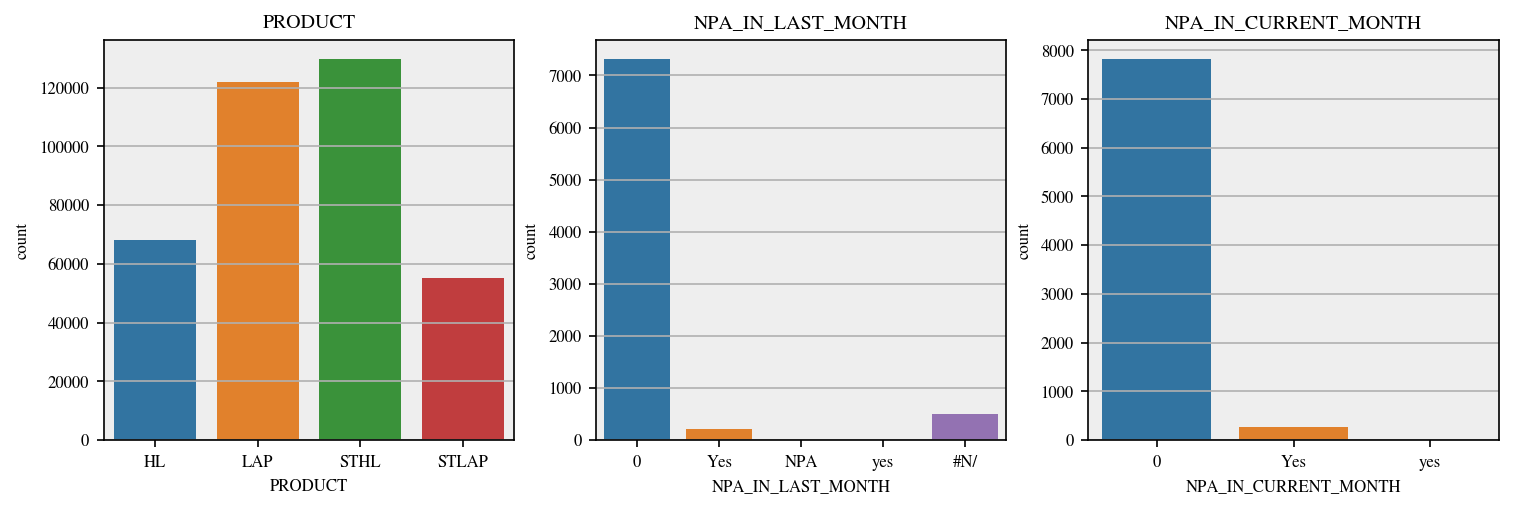

In [96]:
count = 0
plt.figure(figsize=(12,12))
for i in categorical.drop(['CITY']):
    count+=1
    plt.subplot(int(str(33)+str(count)))
#     plt.subplot()
    sns.countplot(train_data[i])
    plt.title(i)
plt.show()

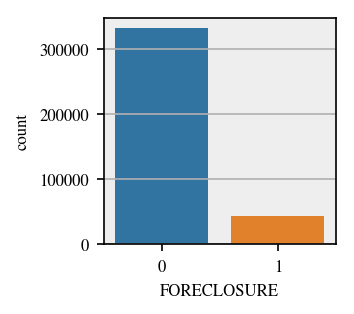

In [100]:
plt.figure(figsize=(2,2))
sns.countplot(train_data['FORECLOSURE'])

In [88]:
train_data['FORECLOSURE'].value_counts()

0    331719
1     42866
Name: FORECLOSURE, dtype: int64

In [89]:
# this is an unbalanced dataset
## we can use smote to deal with this

In [87]:
## plot count plot with hue as FORECLOSURE during bivariate analysis

### FE to do
1. include this small dummy categories into its parent categories

In [55]:
numeric

Index(['AGREEMENTID', 'FORECLOSURE', 'CUSTOMERID', 'LOAN_AMT',
       'NET_DISBURSED_AMT', 'CURRENT_ROI', 'ORIGNAL_ROI', 'CURRENT_TENOR',
       'ORIGNAL_TENOR', 'DUEDAY', 'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT',
       'PRE_EMI_OS_AMOUNT', 'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT',
       'EXCESS_AVAILABLE', 'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS',
       'NET_RECEIVABLE', 'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL',
       'PAID_INTEREST', 'MONTHOPENING', 'LAST_RECEIPT_AMOUNT', 'NET_LTV',
       'COMPLETED_TENURE', 'BALANCE_TENURE', 'DPD', 'FOIR', 'SCHEMEID', 'MOB'],
      dtype='object')

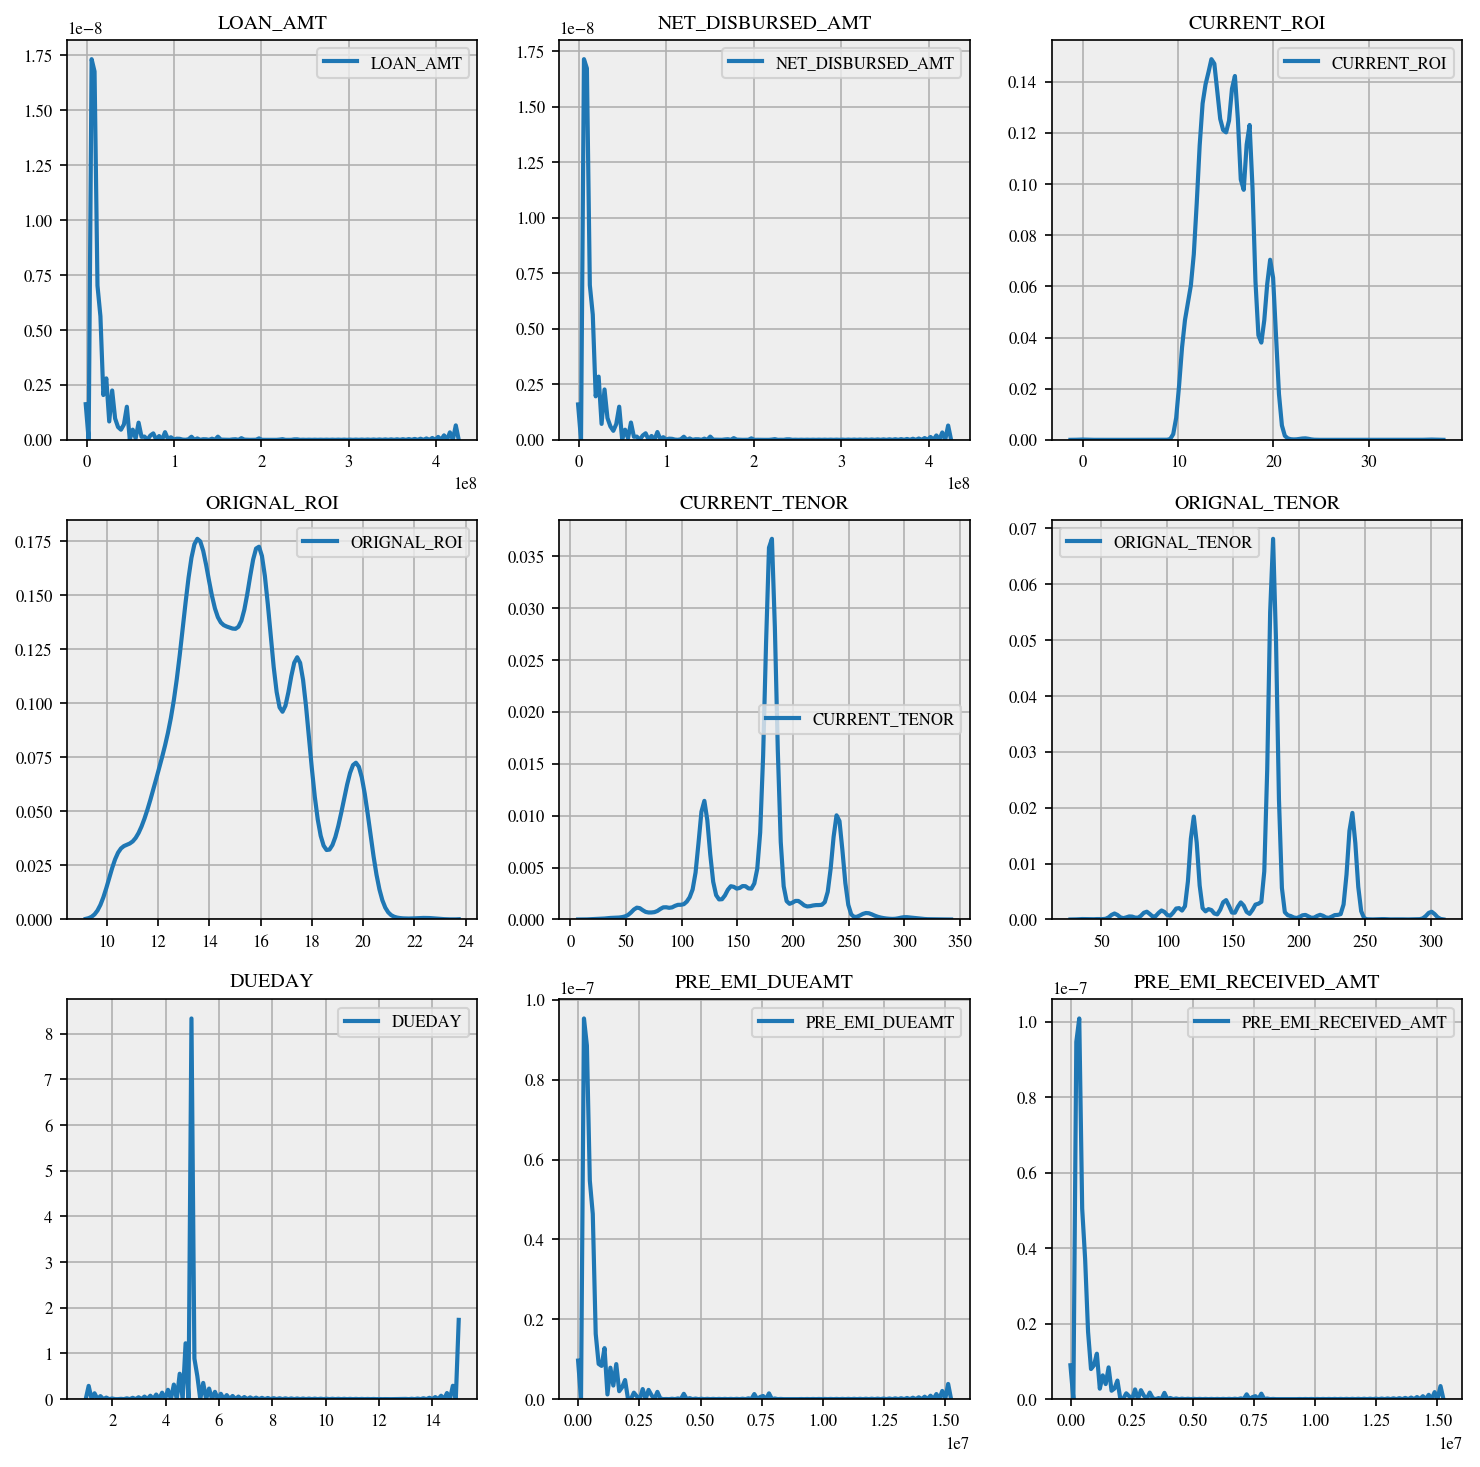

In [72]:
count = 0
done_list  = []
plt.figure(figsize=(12,12))
for i in numeric.drop(['AGREEMENTID', 'FORECLOSURE', 'CUSTOMERID']):
    if count<9:
        count+=1
        plt.subplot(int(str(33)+str(count)))
        df = train_data.dropna()
        sns.kdeplot(df[i])
        plt.title(i)
        done_list.append(i)
plt.show()

## FE to do
1. normalize loan_amount, net_distributed,pre_emi_due, pre_emi_recieved, in both train and test using same kind of transformation

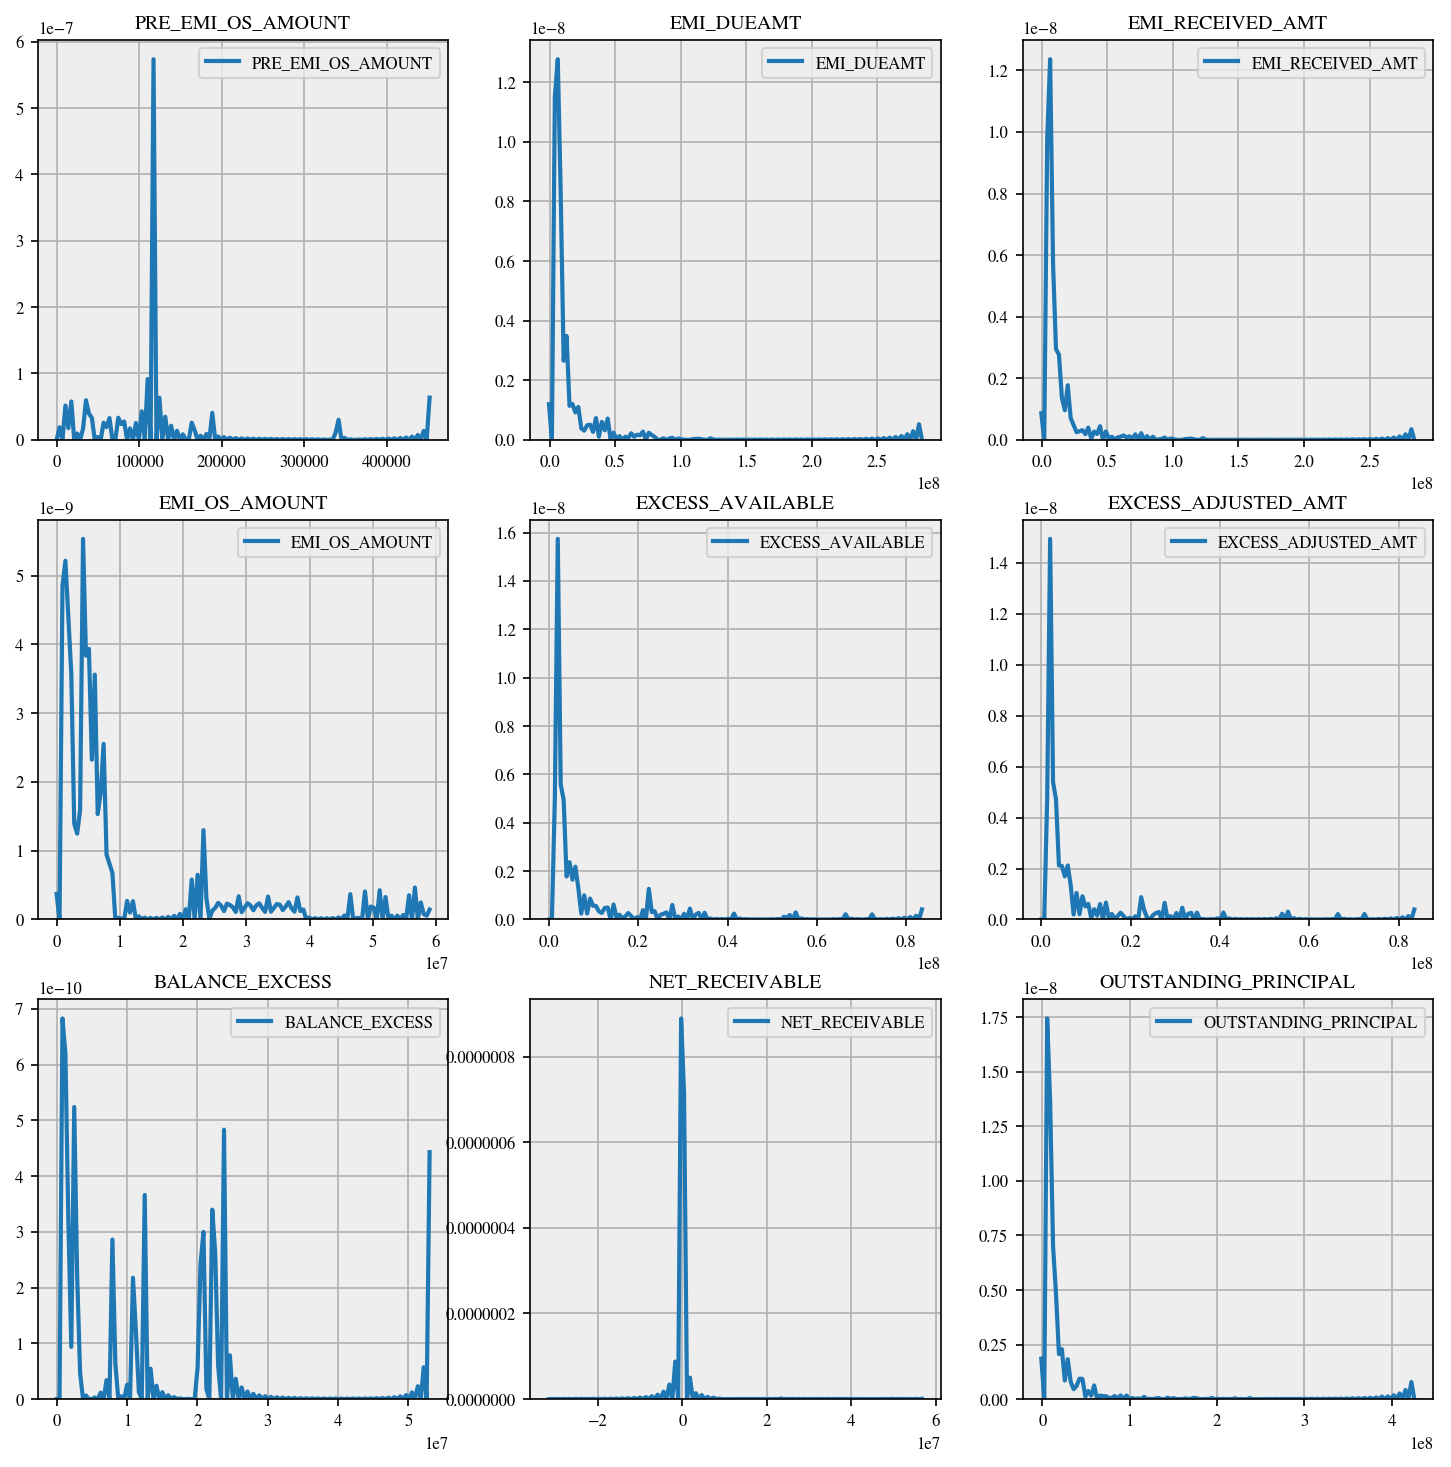

In [74]:
count = 0
plt.figure(figsize=(12,12))
for i in numeric.drop(['AGREEMENTID', 'FORECLOSURE', 'CUSTOMERID']+done_list):
    if count<9:
        count+=1
        plt.subplot(int(str(33)+str(count)))
        df = train_data.dropna()
        sns.kdeplot(df[i])
        plt.title(i)
        done_list.append(i)
plt.show()

## FE to do
1. scale down all of the above in both train and test using same kind of transformation

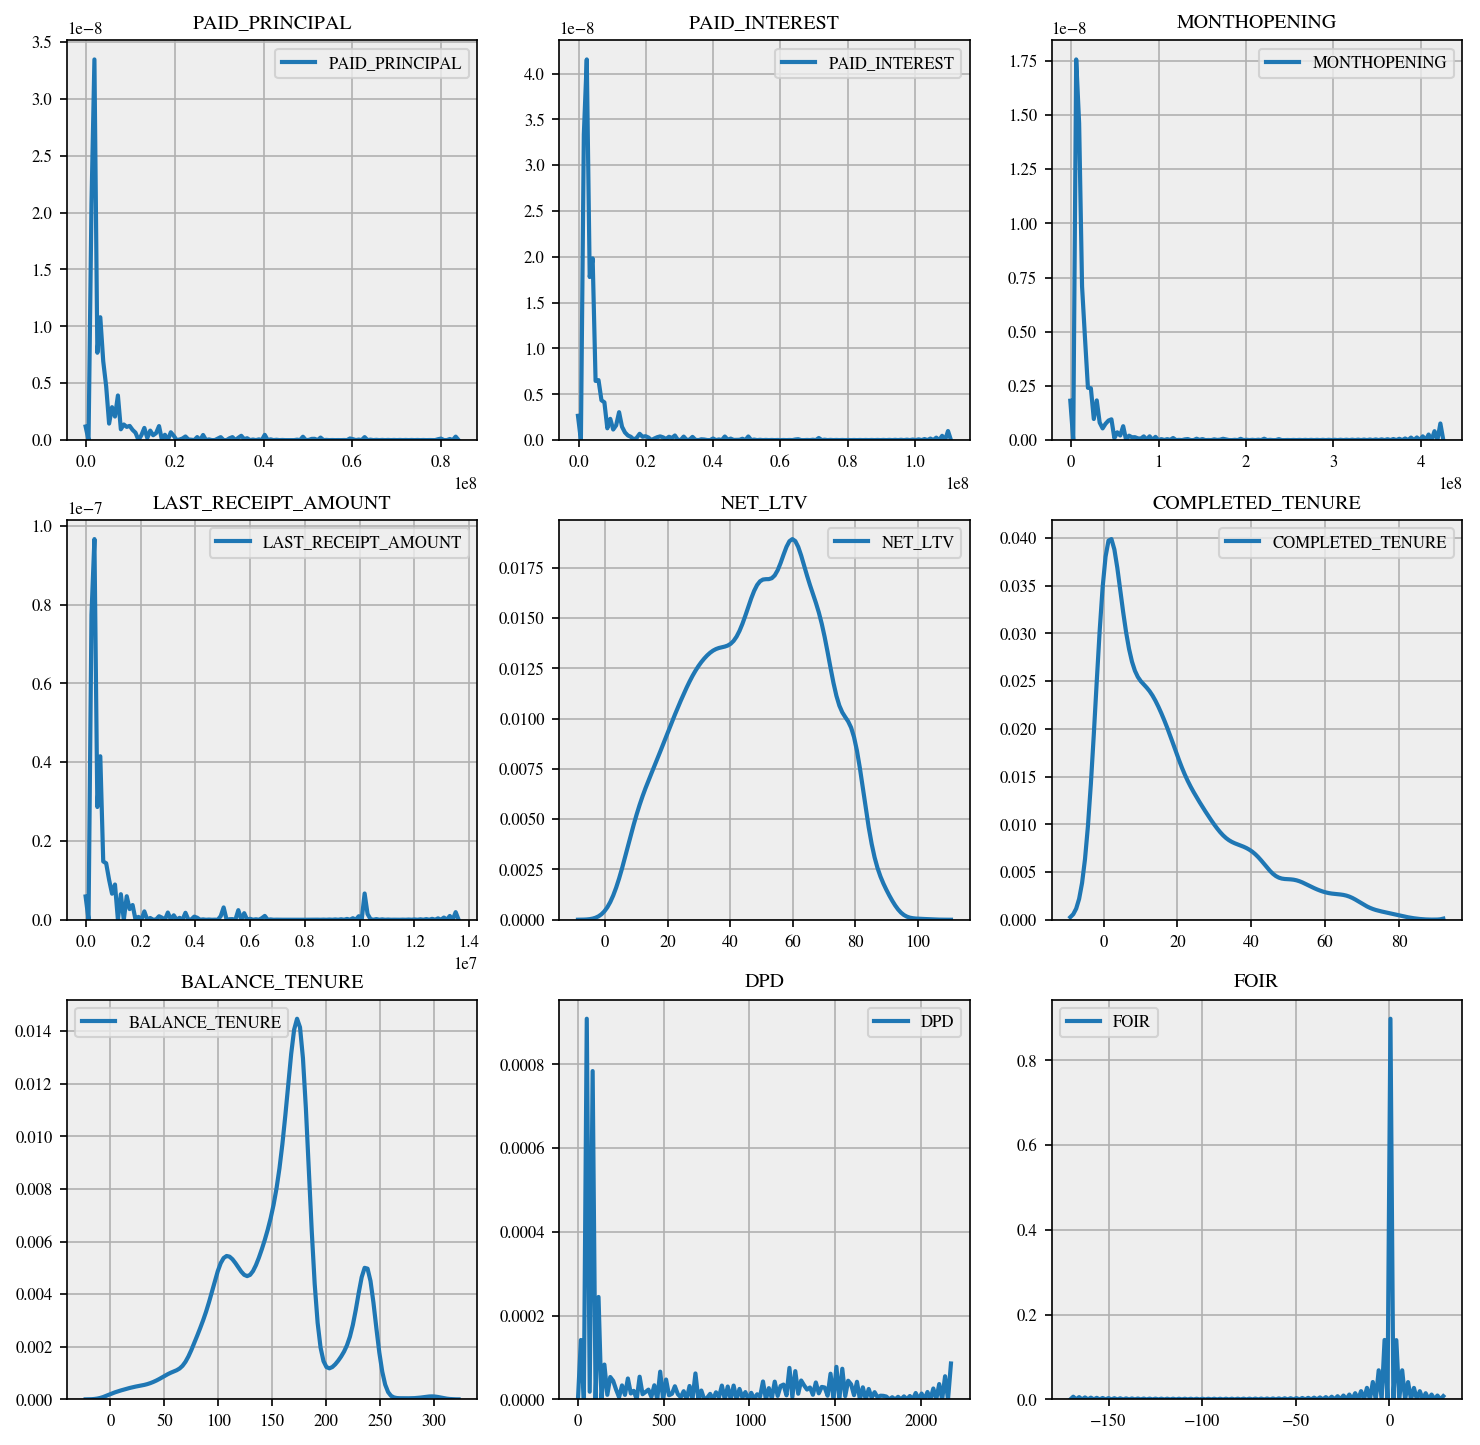

In [75]:
count = 0
plt.figure(figsize=(12,12))
for i in numeric.drop(['AGREEMENTID', 'FORECLOSURE', 'CUSTOMERID']+done_list):
    if count<9:
        count+=1
        plt.subplot(int(str(33)+str(count)))
        df = train_data.dropna()
        sns.kdeplot(df[i])
        plt.title(i)
        done_list.append(i)
plt.show()

## FE to do
1. scale down PAID_Principal, paid_intereset,monthopening,last_recipt_amount, in both train and test using same kind of transformation

In [76]:
train_data.columns

Index(['AGREEMENTID', 'FORECLOSURE', 'CUSTOMERID', 'LOAN_AMT',
       'NET_DISBURSED_AMT', 'INTEREST_START_DATE', 'CURRENT_ROI',
       'ORIGNAL_ROI', 'CURRENT_TENOR', 'ORIGNAL_TENOR', 'DUEDAY',
       'AUTHORIZATIONDATE', 'CITY', 'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT',
       'PRE_EMI_OS_AMOUNT', 'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT',
       'EXCESS_AVAILABLE', 'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS',
       'NET_RECEIVABLE', 'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL',
       'PAID_INTEREST', 'MONTHOPENING', 'LAST_RECEIPT_DATE',
       'LAST_RECEIPT_AMOUNT', 'NET_LTV', 'COMPLETED_TENURE', 'BALANCE_TENURE',
       'DPD', 'FOIR', 'PRODUCT', 'SCHEMEID', 'NPA_IN_LAST_MONTH',
       'NPA_IN_CURRENT_MONTH', 'MOB'],
      dtype='object')

In [77]:
##almost all univariate numeric visualization is done, 

## Bivariate Ananlysis

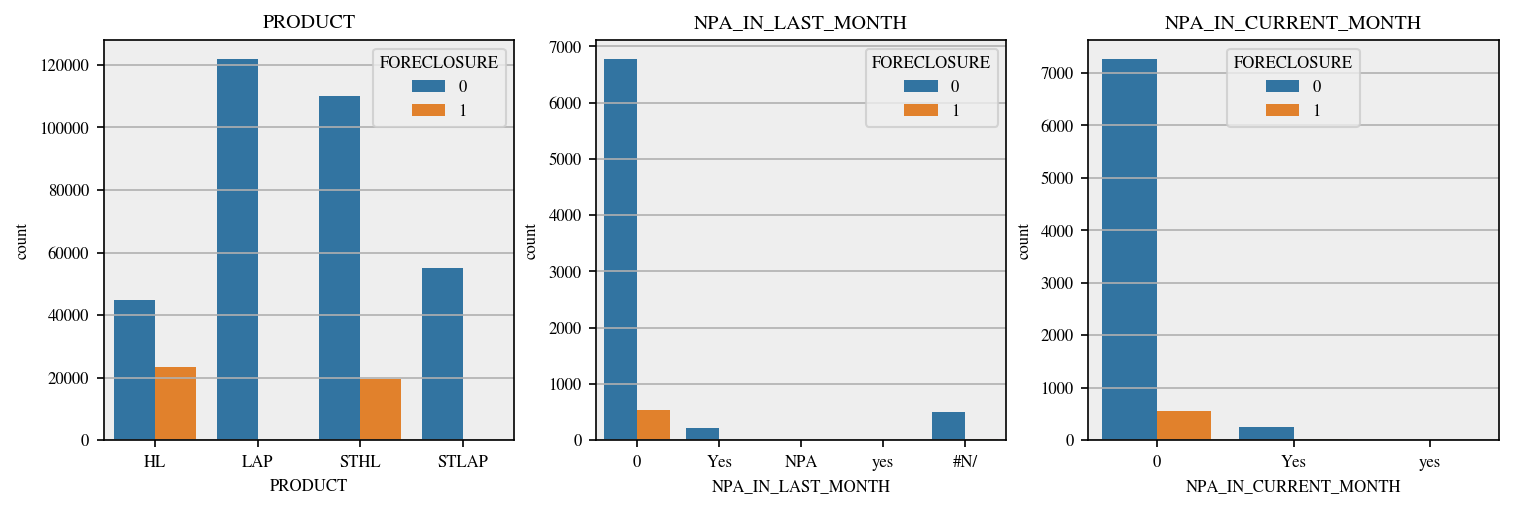

In [95]:
count = 0
plt.figure(figsize=(12,12))
for i in categorical.drop(['CITY']):
    count+=1
    plt.subplot(int(str(33)+str(count)))
#     plt.subplot()
    sns.countplot(train_data[i],hue = train_data['FORECLOSURE'])
    plt.title(i)
plt.show()

<Figure size 600x900 with 0 Axes>

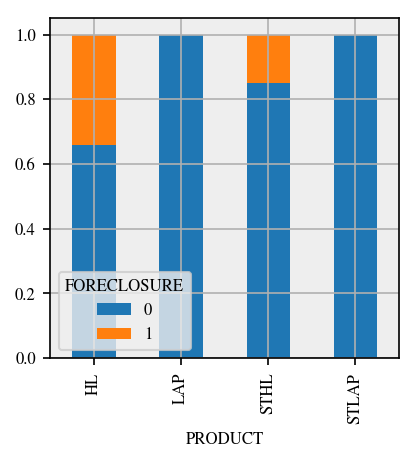

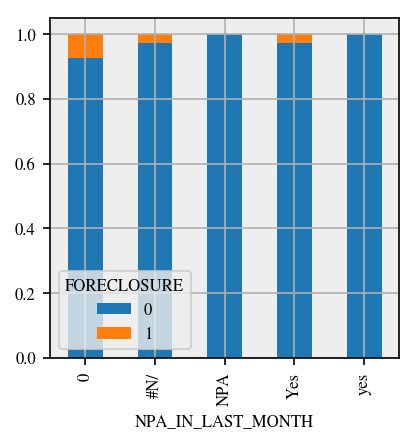

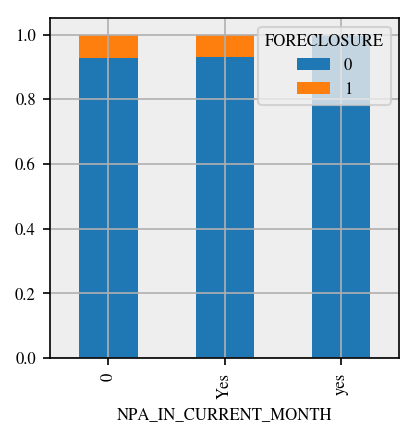

In [109]:
count = 0
plt.figure(figsize=(4,6))
for i in categorical.drop(['CITY']):
    count+=1
#     plt.subplot(int(str(33)+str(count)))
#     plt.subplot()
    var = pd.crosstab(train_data[i],train_data['FORECLOSURE']) 
    var.div(var.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(3,3))
#     sns.countplot(train_data[i],hue = train_data['FORECLOSURE'])
#     plt.title(i)
#     plt.show()


### FE to do
1. we notice that LAP and STLAP agreements product never undergo foreclosure, so we can create a common feature named as is_lap_or_stlap
2. other thing to notice is that null NAP barely undergo foreclosure, anyways we will one-hot encode the feature so no need to create and extra one( although we will merginf its subcategories into a major one, such as YES and yes)

In [110]:
#numeric vs target

In [111]:
numeric

Index(['AGREEMENTID', 'FORECLOSURE', 'CUSTOMERID', 'LOAN_AMT',
       'NET_DISBURSED_AMT', 'CURRENT_ROI', 'ORIGNAL_ROI', 'CURRENT_TENOR',
       'ORIGNAL_TENOR', 'DUEDAY', 'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT',
       'PRE_EMI_OS_AMOUNT', 'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT',
       'EXCESS_AVAILABLE', 'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS',
       'NET_RECEIVABLE', 'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL',
       'PAID_INTEREST', 'MONTHOPENING', 'LAST_RECEIPT_AMOUNT', 'NET_LTV',
       'COMPLETED_TENURE', 'BALANCE_TENURE', 'DPD', 'FOIR', 'SCHEMEID', 'MOB'],
      dtype='object')

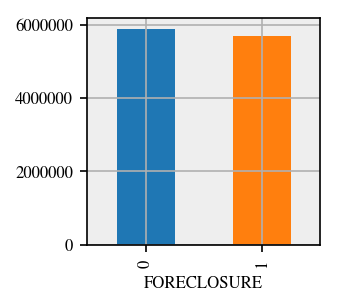

In [129]:
plt.figure(figsize=(2,2))
train_data.groupby('FORECLOSURE')['LOAN_AMT'].mean().plot('bar')

##### we notice that foreclosure agreements loan amounts are slightly lower but still its more or less the same lets plot it for all numeric variables

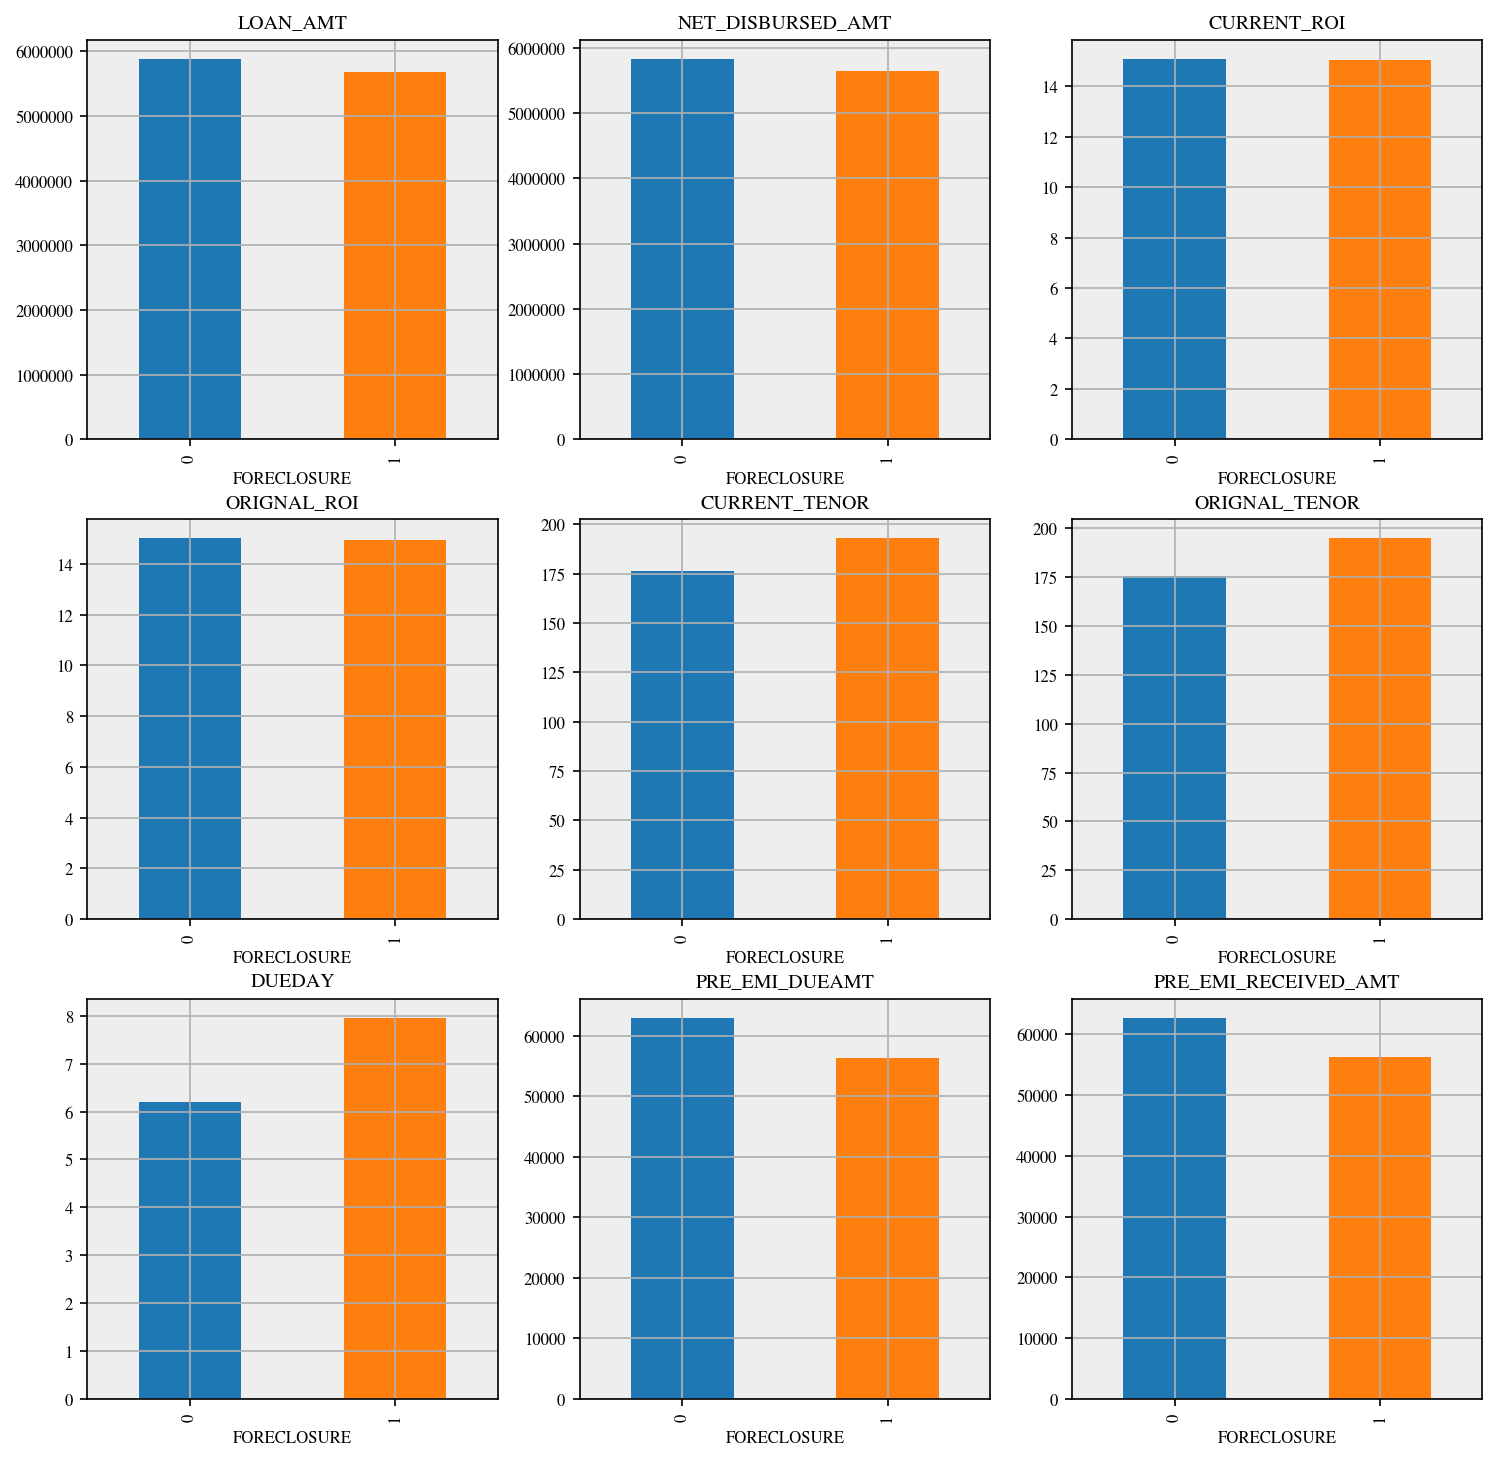

In [124]:
count = 0
done_list_new = []
plt.figure(figsize=(12,12))
for i in numeric.drop(['AGREEMENTID', 'FORECLOSURE', 'CUSTOMERID']+done_list_new):
    if count<9:
        count+=1
        plt.subplot(int(str(33)+str(count)))
#         df = train_data.dropna()
#         sns.kdeplot(df[i])
        train_data.groupby('FORECLOSURE')[i].mean().plot('bar')
        plt.title(i)
        done_list_new.append(i)
plt.show()

In [194]:
## one thing should be clear is that if due is higher then obbb received will be higher,
## because anyhow the loan is paid only 

1. LOAN_AMT , NET_DISTRIBUTED_AMT mean is lower for foreclosure, lets bin this variables to explore them more, while ROIs are exact same. 
2. both current and original tenor, and dueday are higher for forclosure which confirms the idleness of borrower, which lead to foreclosure
3. both pre_emi_due and recieved amt for non-foreclosure is higher, but lets check their diffrence whichis due-recieved, which will give a clear picture of what is happening


In [154]:
train_data['LOAN_AMT'].describe() , train_data['NET_DISBURSED_AMT'].describe()

(count    3.745850e+05
 mean     5.859862e+06
 std      1.269848e+07
 min      3.753240e+04
 25%      1.523815e+06
 50%      2.627268e+06
 75%      5.254535e+06
 max      4.245665e+08
 Name: LOAN_AMT, dtype: float64, count    3.745850e+05
 mean     5.813433e+06
 std      1.261270e+07
 min      3.753240e+04
 25%      1.501296e+06
 50%      2.579226e+06
 75%      5.229163e+06
 max      4.245665e+08
 Name: NET_DISBURSED_AMT, dtype: float64)

In [163]:
bins=[3.753240e+04,1.523815e+06, 2.627268e+06,5.254535e+06,4.245665e+08] 
group=['Low','Average','High', 'Very high'] 
train_data['LOAN_AMT_BINNED']=pd.cut(train_data['LOAN_AMT'],bins,labels=group)

In [164]:
# del train_data['LOAN_AMT_BINNED']

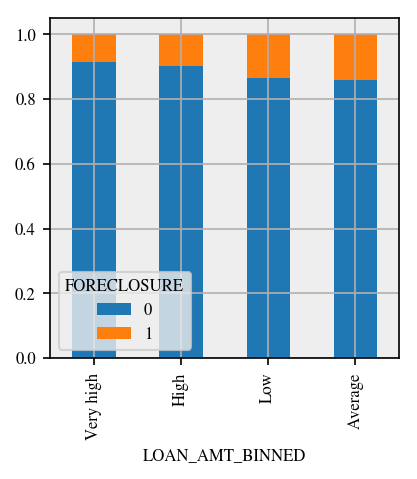

In [167]:
var = pd.crosstab(train_data['LOAN_AMT_BINNED'],train_data['FORECLOSURE']) 
var.div(var.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(3,3))

1. for low and average loan_amount, foreclosure is slightly more
2. and from the stats above it seems that net_amnt would also show a same kind of behaviour if binned

In [191]:
train_data['due_vs_received_diff'] = (train_data['PRE_EMI_DUEAMT'] - train_data['PRE_EMI_RECEIVED_AMT'])/train_data['PRE_EMI_DUEAMT']

In [192]:
train_data.groupby('FORECLOSURE')['due_vs_received_diff'].mean()#.plot('bar')

FORECLOSURE
0    0.001238
1    0.000723
Name: due_vs_received_diff, dtype: float64

In [177]:
train_data['total_emi_due'] = train_data['PRE_EMI_DUEAMT'] + train_data['EMI_DUEAMT']

In [178]:
train_data['total_emi_receive'] = train_data['PRE_EMI_RECEIVED_AMT'] + train_data['EMI_RECEIVED_AMT']

In [179]:
train_data['diff_2'] = (train_data['total_emi_due'] - train_data['total_emi_receive'])/train_data['tota']

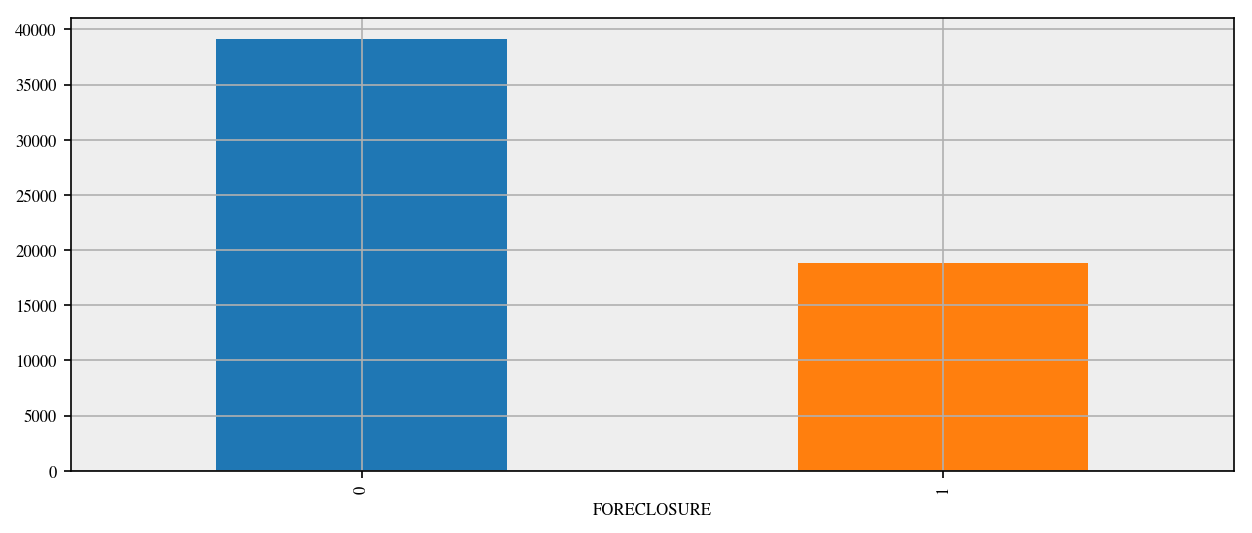

In [181]:
train_data.groupby('FORECLOSURE')['diff_2'].mean().plot('bar')

#### lets just check mode of ROI for foreclosure and not-..

In [145]:
import scipy
from scipy import stats 
train_data.groupby('FORECLOSURE')['CURRENT_ROI'].agg(lambda x: scipy.stats.mode(x)[0])#.plot('bar')

FORECLOSURE
0    17.479728
1    17.479728
Name: CURRENT_ROI, dtype: float64

In [147]:
train_data.groupby('FORECLOSURE')['ORIGNAL_ROI'].agg(lambda x: scipy.stats.mode(x)[0])#.plot('bar')

FORECLOSURE
0    17.479728
1    17.479728
Name: ORIGNAL_ROI, dtype: float64

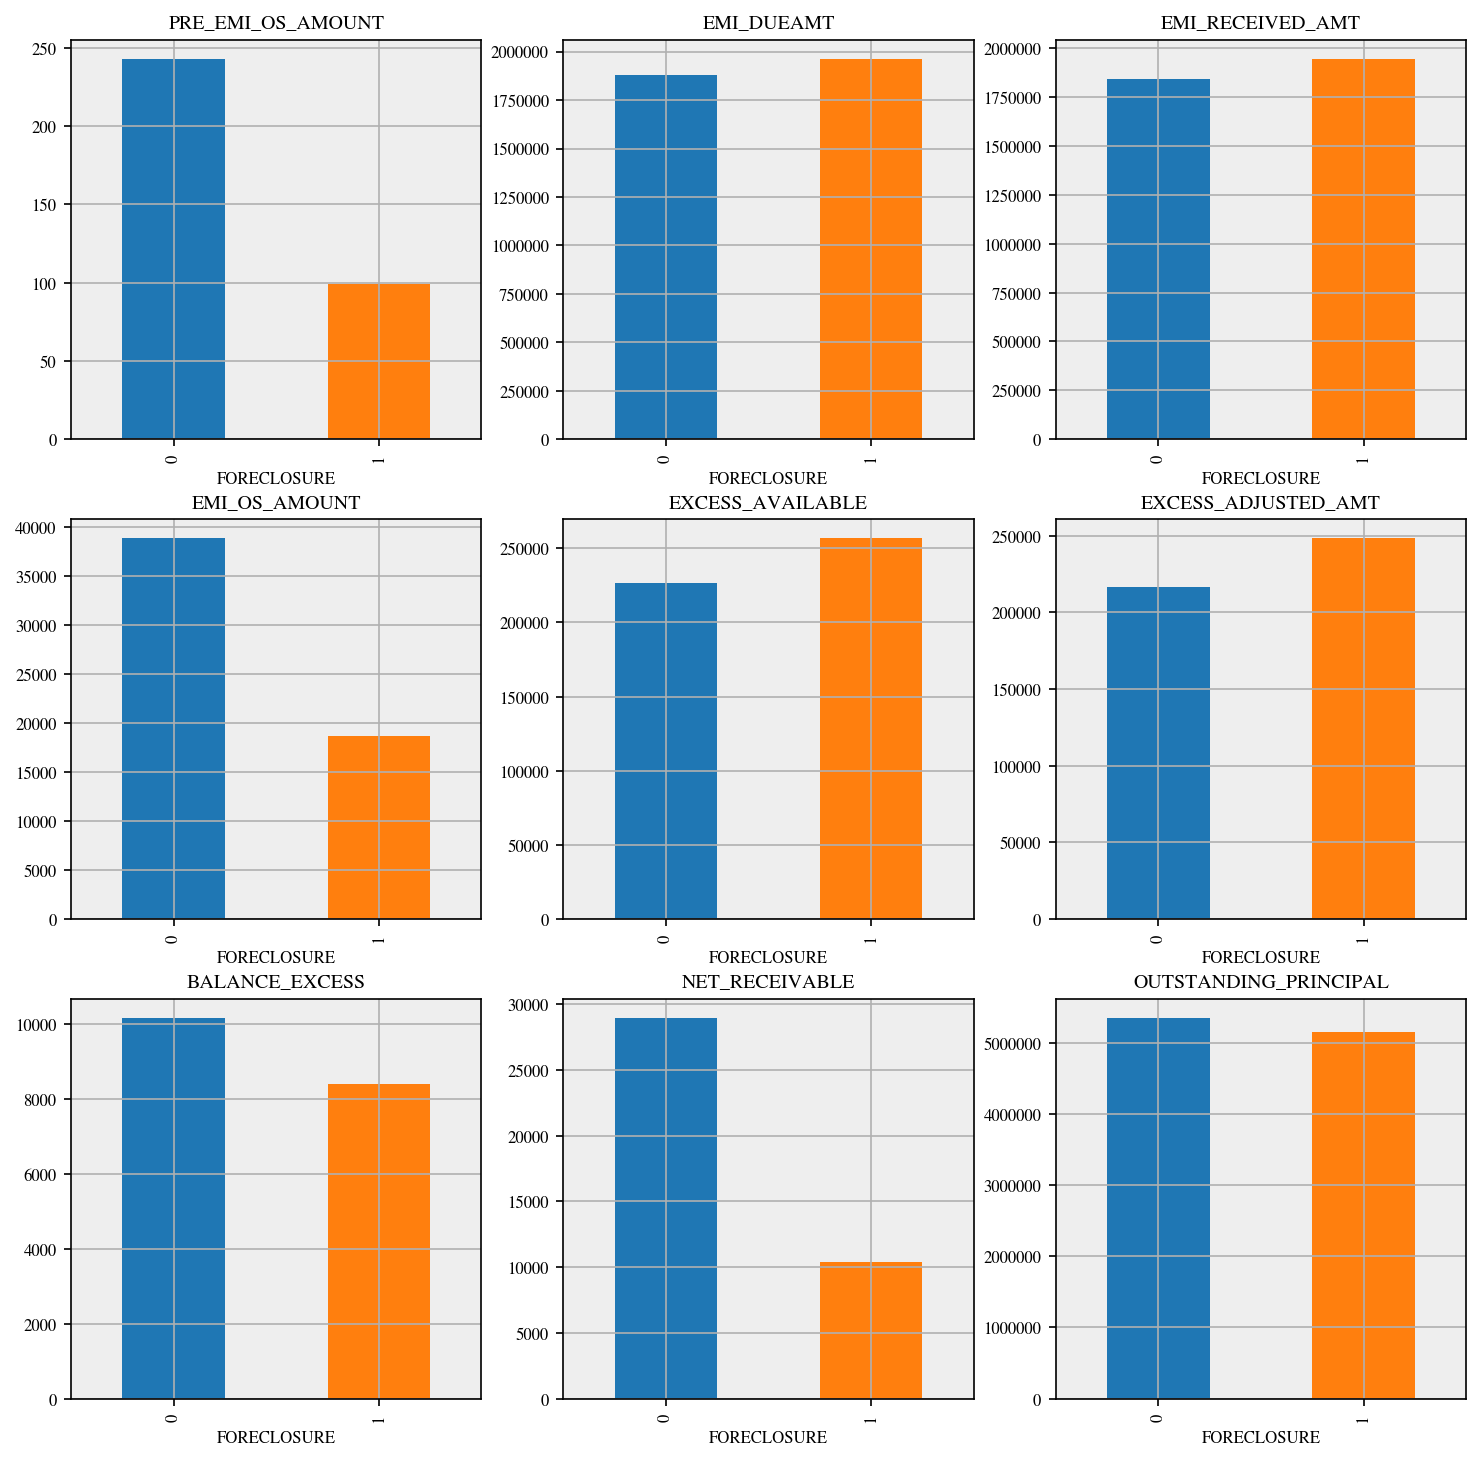

In [126]:
count = 0

plt.figure(figsize=(12,12))
for i in numeric.drop(['AGREEMENTID', 'FORECLOSURE', 'CUSTOMERID']+done_list_new):
    if count<9:
        count+=1
        plt.subplot(int(str(33)+str(count)))
#         df = train_data.dropna()
#         sns.kdeplot(df[i])
        train_data.groupby('FORECLOSURE')[i].mean().plot('bar')
        plt.title(i)
        done_list_new.append(i)
plt.show()

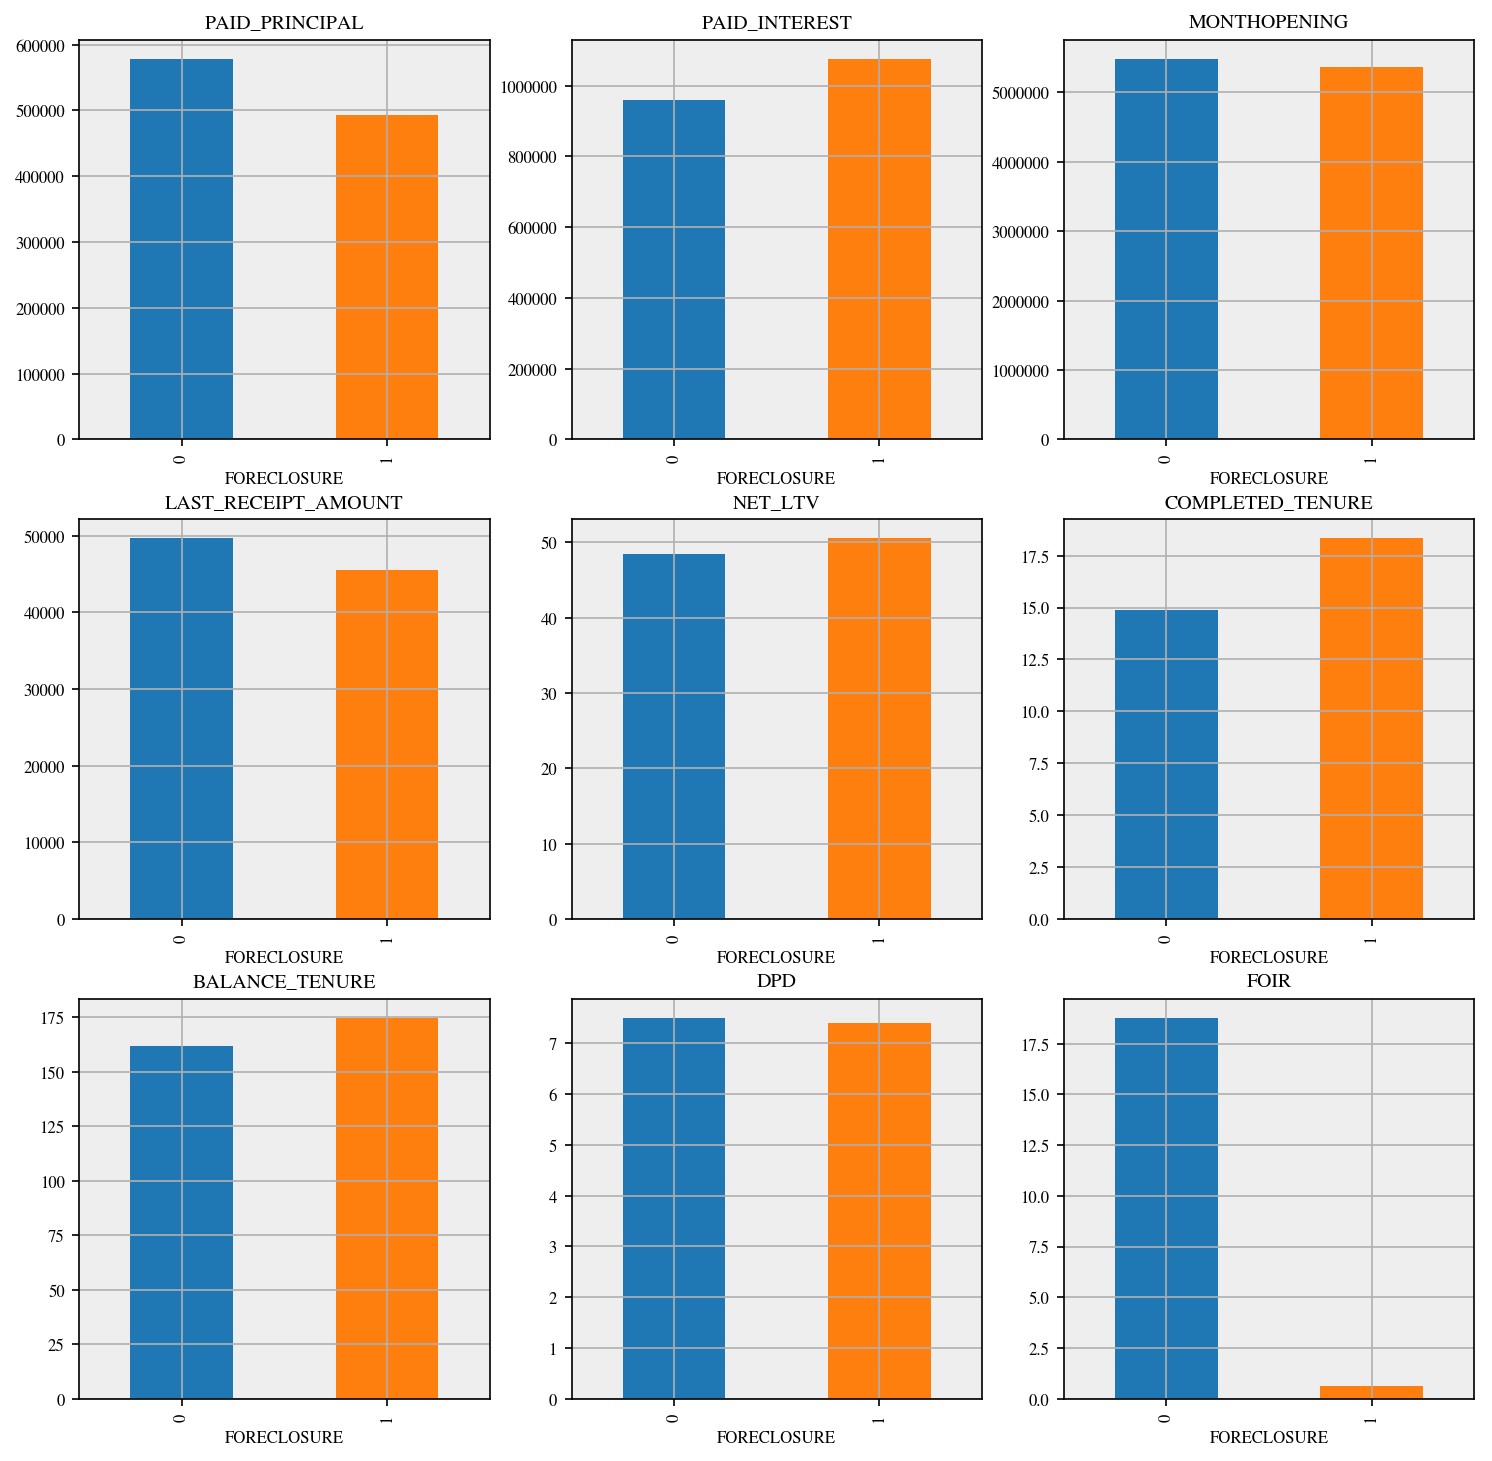

In [127]:
count = 0

plt.figure(figsize=(12,12))
for i in numeric.drop(['AGREEMENTID', 'FORECLOSURE', 'CUSTOMERID']+done_list_new):
    if count<9:
        count+=1
        plt.subplot(int(str(33)+str(count)))
#         df = train_data.dropna()
#         sns.kdeplot(df[i])
        train_data.groupby('FORECLOSURE')[i].mean().plot('bar')
        plt.title(i)
        done_list_new.append(i)
plt.show()

In [195]:
train_data.columns

Index(['AGREEMENTID', 'FORECLOSURE', 'CUSTOMERID', 'LOAN_AMT',
       'NET_DISBURSED_AMT', 'INTEREST_START_DATE', 'CURRENT_ROI',
       'ORIGNAL_ROI', 'CURRENT_TENOR', 'ORIGNAL_TENOR', 'DUEDAY',
       'AUTHORIZATIONDATE', 'CITY', 'PRE_EMI_DUEAMT', 'PRE_EMI_RECEIVED_AMT',
       'PRE_EMI_OS_AMOUNT', 'EMI_DUEAMT', 'EMI_RECEIVED_AMT', 'EMI_OS_AMOUNT',
       'EXCESS_AVAILABLE', 'EXCESS_ADJUSTED_AMT', 'BALANCE_EXCESS',
       'NET_RECEIVABLE', 'OUTSTANDING_PRINCIPAL', 'PAID_PRINCIPAL',
       'PAID_INTEREST', 'MONTHOPENING', 'LAST_RECEIPT_DATE',
       'LAST_RECEIPT_AMOUNT', 'NET_LTV', 'COMPLETED_TENURE', 'BALANCE_TENURE',
       'DPD', 'FOIR', 'PRODUCT', 'SCHEMEID', 'NPA_IN_LAST_MONTH',
       'NPA_IN_CURRENT_MONTH', 'MOB', 'LOAN_AMT_BINNED',
       'due_vs_recieved_diff', 'total_emi_due', 'total_emi_receive', 'diff_2',
       'due_vs_received_diff'],
      dtype='object')

In [207]:
## correlation matrix

In [219]:
corr = train_data.corr()

In [218]:
train_data.columns  = train_data.columns.str.lower()

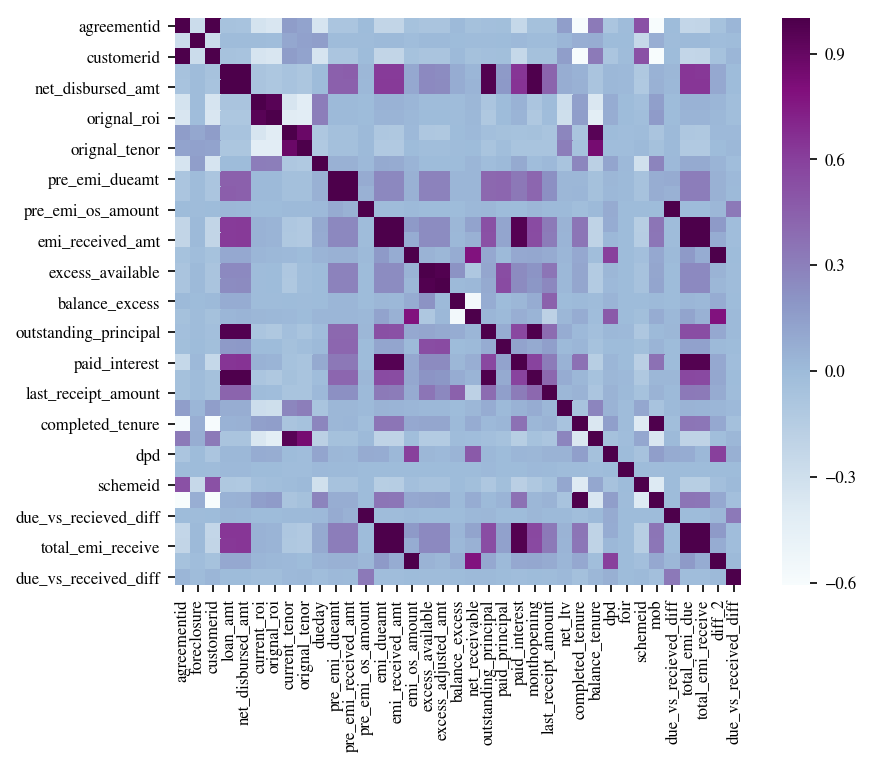

In [220]:
plt.figure(figsize=(7,5))
sns.heatmap(corr,square=True,cmap='BuPu')

In [217]:
corr['foreclosure']

agreementid             -0.276735
foreclosure              1.000000
customerid              -0.276817
loan_amt                -0.004955
net_disbursed_amt       -0.004698
current_roi             -0.006418
orignal_roi             -0.010118
current_tenor            0.104760
orignal_tenor            0.139815
dueday                   0.158156
pre_emi_dueamt          -0.005782
pre_emi_received_amt    -0.005667
pre_emi_os_amount       -0.004267
emi_dueamt               0.004030
emi_received_amt         0.005082
emi_os_amount           -0.010219
excess_available         0.004263
excess_adjusted_amt      0.004619
balance_excess          -0.001191
net_receivable          -0.007843
outstanding_principal   -0.005219
paid_principal          -0.001777
paid_interest            0.012129
monthopening            -0.003318
last_receipt_amount     -0.005080
net_ltv                  0.032306
completed_tenure         0.070595
balance_tenure           0.077161
dpd                     -0.000477
foir          

#### now the main task is to decide, which variables matter the most for foreclosure prediction
##### variable analysis by domain knowledge